### Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### Carga de Datasets
Cargamos el dataset principal 'Internet.xlsx'.  
El codigo devuelve el nombre de la hoja, el shape, los nombres de las columnas y si tiene nulos (su cantidad)

In [2]:
# Leer todas las hojas del archivo Excel
excel_file = pd.ExcelFile('Datasets/Internet.xlsx')

# Obtener los nombres de todas las hojas
sheet_names = excel_file.sheet_names

# Crear un diccionario para almacenar los DataFrames de cada hoja
dfs = {}

# Iterar sobre cada hoja y cargarla en un DataFrame
for sheet in sheet_names:
    dfs[sheet] = pd.read_excel(excel_file, sheet_name=sheet)

# Imprimir información básica sobre cada hoja
for sheet, df in dfs.items():
    print(f"\nHoja: {sheet}")
    print(f"Dimensiones: {df.shape}")
    print(f"Columnas: {df.columns.tolist()}")
    # Verificar si hay valores nulos y contar cuántos hay
    null_count = df.isnull().sum().sum()
    has_nulls = null_count > 0
    
    print(f"Tiene valores nulos: {has_nulls}")
    if has_nulls:
        print(f"Cantidad total de valores nulos: {null_count}")
        
        # Opcionalmente, puedes mostrar el conteo de nulos por columna
        null_by_column = df.isnull().sum()
        columns_with_nulls = null_by_column[null_by_column > 0]
        if not columns_with_nulls.empty:
            print("Valores nulos por columna:")
            for col, count in columns_with_nulls.items():
                print(f"  {col}: {count}")
    
    print("\n---")


Hoja: Acc_vel_loc_sinrangos
Dimensiones: (3065, 125)
Columnas: ['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros', '0,256 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps', '3 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps', '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps', '8 Mbps', '9 Mbps', '10 Mbps', '10,1 Mbps', '10,2 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps', '20 Mbps', '20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '35 Mbps', '36 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '48 Mbps', '49 Mbps', '50 Mbps', '50,1 Mbps', '50,25 Mbps', '51 Mbps', '55 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '65 Mbps', '66 Mbps', '70 Mbps', '75 Mbps', '80 Mbps', '85 Mbps', '90 Mbps', '95 Mbps', '98 Mbps', '100 Mbps', '100,1 Mbps', '100,25 Mbps', '105 Mbps', '110 Mbps', '120

In [3]:
# Visualizar los nombres de las columnas
sheet_names

['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por velocidad',
 'Accesos por velocidad',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

In [4]:
# Visualizar los dataframes para conocer su estructura
dfs['Penetracion-hogares'].head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [5]:
dfs['Penetracion-hogares'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [6]:
dfs['Accesos Por Tecnología'].head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [7]:
dfs['Accesos Por Tecnología'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


In [8]:
print('Dataframe: Velocidad % por prov')
print(dfs['Velocidad % por prov'].head())
print('*******' * 10)
print(dfs['Velocidad % por prov'].info())

Dataframe: Velocidad % por prov
    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          1     Buenos Aires                  159.13
1  2024          1  Capital Federal                  229.94
2  2024          1        Catamarca                   91.45
3  2024          1            Chaco                  107.51
4  2024          1           Chubut                   20.50
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB
None


In [9]:
print('Dataframe: Accesos por velocidad')
print(dfs['Accesos por velocidad'].head())
print('*******' * 10)
print(dfs['Accesos por velocidad'].info())

Dataframe: Accesos por velocidad
    Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          1     Buenos Aires         26002.0              22510.0   
1  2024          1  Capital Federal           516.0               5418.0   
2  2024          1        Catamarca            71.0                176.0   
3  2024          1            Chaco           236.0                416.0   
4  2024          1           Chubut           111.0               1083.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           221185.0            233225.0             241778.0   
1            29753.0             51415.0              37369.0   
2             2872.0              3424.0               4204.0   
3            14156.0              9044.0               5533.0   
4            43828.0             31885.0              23024.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106418.0  4068292.0  125147.0  5044557.0  
1    

In [10]:
print('Dataframe: Totales VMD')
print(dfs['Totales VMD'].head())
print('*******' * 10)
print(dfs['Totales VMD'].info())

Dataframe: Totales VMD
    Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          1                  139.15   Ene-Mar 2024
1  2023          4                  139.04   Oct-Dic 2023
2  2023          3                  129.67  Jul-Sept 2023
3  2023          2                  123.95   Abr-Jun 2023
4  2023          1                  110.50   Ene-Mar 2023
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     41 non-null     int64  
 1   Trimestre               41 non-null     int64  
 2   Mbps (Media de bajada)  41 non-null     float64
 3   Trimestre.1             41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB
None


# Análisis Preliminar y Recomendaciones para el Proyecto de Telecomunicaciones

## Hojas Principales a Utilizar

1. **"Penetracion-hogares"**: Esta hoja es crucial para el KPI propuesto (aumentar el acceso a internet por cada 100 hogares).
2. **"Accesos Por Tecnología"**: Proporciona información valiosa sobre los tipos de conexiones, lo que puede ayudar a identificar oportunidades de crecimiento.
3. **"Velocidad % por prov"**: Útil para analizar la calidad del servicio por provincia.
4. **"Accesos por velocidad"**: Complementa la información de velocidad y puede ayudar a identificar áreas de mejora.
5. **"Ingresos"**: Importante para el análisis financiero y la evaluación del desempeño del negocio.

## Relaciones y Análisis Potenciales

1. **Penetración vs. Tecnología**: Cruzar datos de "Penetracion-hogares" con "Accesos Por Tecnología" para ver qué tecnologías están impulsando el crecimiento en diferentes provincias.

2. **Velocidad vs. Penetración**: Comparar "Velocidad % por prov" con "Penetracion-hogares" para ver si hay correlación entre la velocidad ofrecida y la adopción del servicio.

3. **Evolución Temporal**: Usar las columnas de "Año" y "Trimestre" presentes en varias hojas para analizar tendencias a lo largo del tiempo.

4. **Análisis Geográfico**: Utilizar la columna "Provincia" en varias hojas para realizar comparaciones y análisis regionales.

5. **Ingresos vs. Penetración y Velocidad**: Correlacionar los ingresos con la penetración y la velocidad para entender qué factores impulsan los ingresos.

## Acciones Recomendadas

1. **Limpieza y Preparación de Datos**:
   - Manejar valores nulos, especialmente en hojas como "Accesos por velocidad" donde hay algunos valores faltantes.
   - Asegurar consistencia en los tipos de datos entre hojas similares.

2. **Creación de Dashboards Interactivos**:
   - Desarrollar visualizaciones que permitan filtrar por año, trimestre y provincia.
   - Crear gráficos de tendencias para mostrar la evolución de la penetración, velocidades y tecnologías a lo largo del tiempo.

3. **Análisis de KPIs**:
   - Implementar el KPI propuesto utilizando la hoja "Penetracion-hogares".
   - Desarrollar KPIs adicionales, como "Porcentaje de conexiones de alta velocidad" o "Tasa de adopción de fibra óptica".

4. **Segmentación de Mercado**:
   - Utilizar la hoja "Accesos_tecnologia_localidad" para un análisis más granular y identificar patrones a nivel de localidad.

5. **Análisis de Competitividad**:
   - Comparar las velocidades y tecnologías ofrecidas en diferentes provincias para identificar áreas de oportunidad.

6. **Proyecciones y Modelado**:
   - Utilizar los datos históricos para crear modelos predictivos de crecimiento y demanda futura.

## Hojas que Podrían Tener Menor Prioridad

1. **"Acc_vel_loc_sinrangos"**: Aunque detallada, puede ser demasiado granular para el análisis inicial. Considerar usarla para análisis específicos si es necesario.
2. **"Velocidad_sin_Rangos"**: Similar a la anterior, puede ser demasiado detallada para el análisis principal.
3. **"Totales VMD"**: Parece ser un resumen, pero las hojas más detalladas podrían ser más útiles para el análisis.

***

## Próximos Pasos

1. Comenzar con un análisis exploratorio detallado de las hojas principales identificadas.
2. Crear visualizaciones preliminares para identificar tendencias y patrones.
3. Desarrollar un dashboard interactivo que integre los datos más relevantes de las diferentes hojas.
4. Calcular y visualizar el KPI propuesto, junto con otros KPIs relevantes que se identifiquen.
5. Preparar un informe con recomendaciones basadas en los hallazgos del análisis.


In [11]:
# Convertir todas las columnas 'Año' y 'Trimestre' a tipo Int64, y columnas 'Fecha' a tipo datetime por cada Dataframe
for name, df in dfs.items():
    if 'Año' in df.columns:
        df['Año'] = pd.to_numeric(df['Año'], errors='coerce').astype('Int64')
    if 'Trimestre' in df.columns:
        df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
    if 'Fecha' in df.columns:
        df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    dfs[name] = df

# Ahora 'dfs' contiene los dataframes con las columnas convertidas si existían

# EDA 1° Parte
### 1. Análisis temporal y geográfico

In [12]:
print('Totales VMD info:')
print(dfs['Totales VMD'].info())

Totales VMD info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     41 non-null     Int64  
 1   Trimestre               41 non-null     Int64  
 2   Mbps (Media de bajada)  41 non-null     float64
 3   Trimestre.1             41 non-null     object 
dtypes: Int64(2), float64(1), object(1)
memory usage: 1.5+ KB
None


In [13]:
print('Totales VMD:')
print(dfs['Totales VMD'].describe())

Totales VMD:
               Año  Trimestre  Mbps (Media de bajada)
count         41.0       41.0               41.000000
mean   2018.634146   2.463415               36.897805
std       2.997967   1.142313               41.190813
min         2014.0        1.0                3.617127
25%         2016.0        1.0                5.938777
50%         2019.0        2.0               17.380000
75%         2021.0        3.0               48.460000
max         2024.0        4.0              139.150000


In [14]:
print('Totales VMD:')
print('head:')
print(dfs['Totales VMD'].head())
print('tail:')
print(dfs['Totales VMD'].tail())

Totales VMD:
head:
    Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          1                  139.15   Ene-Mar 2024
1  2023          4                  139.04   Oct-Dic 2023
2  2023          3                  129.67  Jul-Sept 2023
3  2023          2                  123.95   Abr-Jun 2023
4  2023          1                  110.50   Ene-Mar 2023
tail:
     Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
36  2015          1                4.350279   Ene-Mar 2015
37  2014          4                4.156888   Oct-Dic 2014
38  2014          3                3.867265  Jul-Sept 2014
39  2014          2                3.758712   Abr-Jun 2014
40  2014          1                3.617127   Ene-Mar 2014


In [15]:
print('Velocidad % por prov, info:')
print(dfs['Velocidad % por prov'].info())
print('Velocidad % por prov, describe:')
print(dfs['Velocidad % por prov'].describe())
print('Velocidad % por prov:')
print('head:')
print(dfs['Velocidad % por prov'].head())
print('tail:')
print(dfs['Velocidad % por prov'].tail())

Velocidad % por prov, info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    Int64  
 1   Trimestre               984 non-null    Int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: Int64(2), float64(1), object(1)
memory usage: 32.8+ KB
None
Velocidad % por prov, describe:
               Año  Trimestre  Mbps (Media de bajada)
count        984.0      984.0              984.000000
mean   2018.634146   2.463415               23.186898
std       2.962686    1.12887               31.623977
min         2014.0        1.0                2.573729
25%         2016.0        1.0                4.762379
50%         2019.0        2.0                9.307228
75%         2021.0        3.0               27.636730
max         2024.0

In [16]:
dfs['Velocidad % por prov']['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

Evolución de la velocidad media nacional:

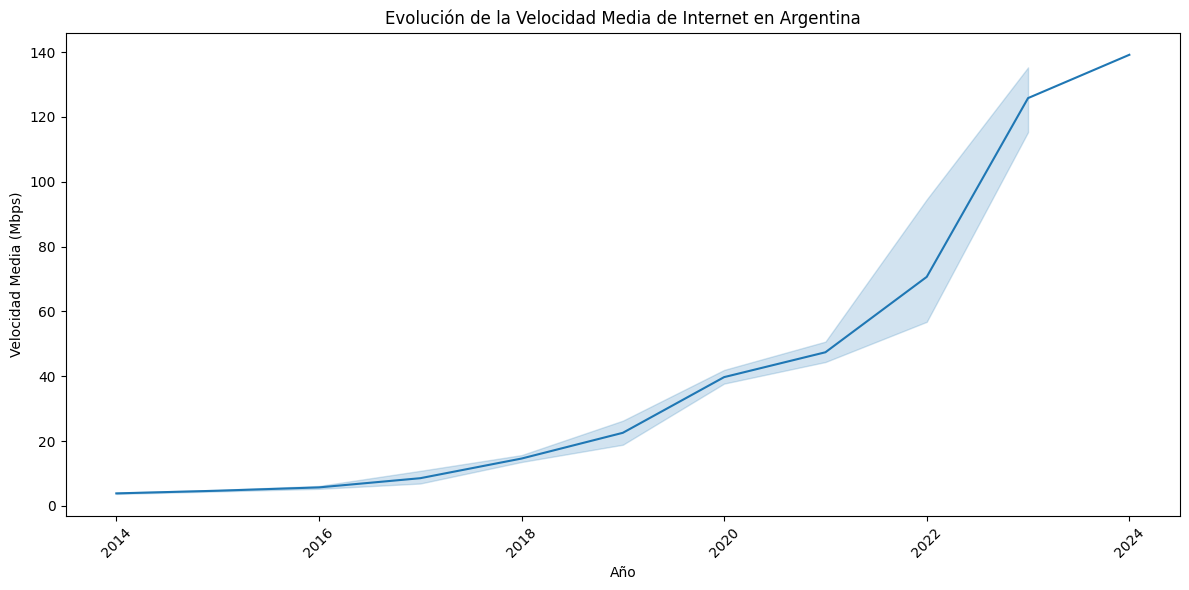

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfs['Totales VMD'], x='Año', y='Mbps (Media de bajada)')
plt.title('Evolución de la Velocidad Media de Internet en Argentina')
plt.xlabel('Año')
plt.ylabel('Velocidad Media (Mbps)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comparación de velocidades entre provincias (último período):

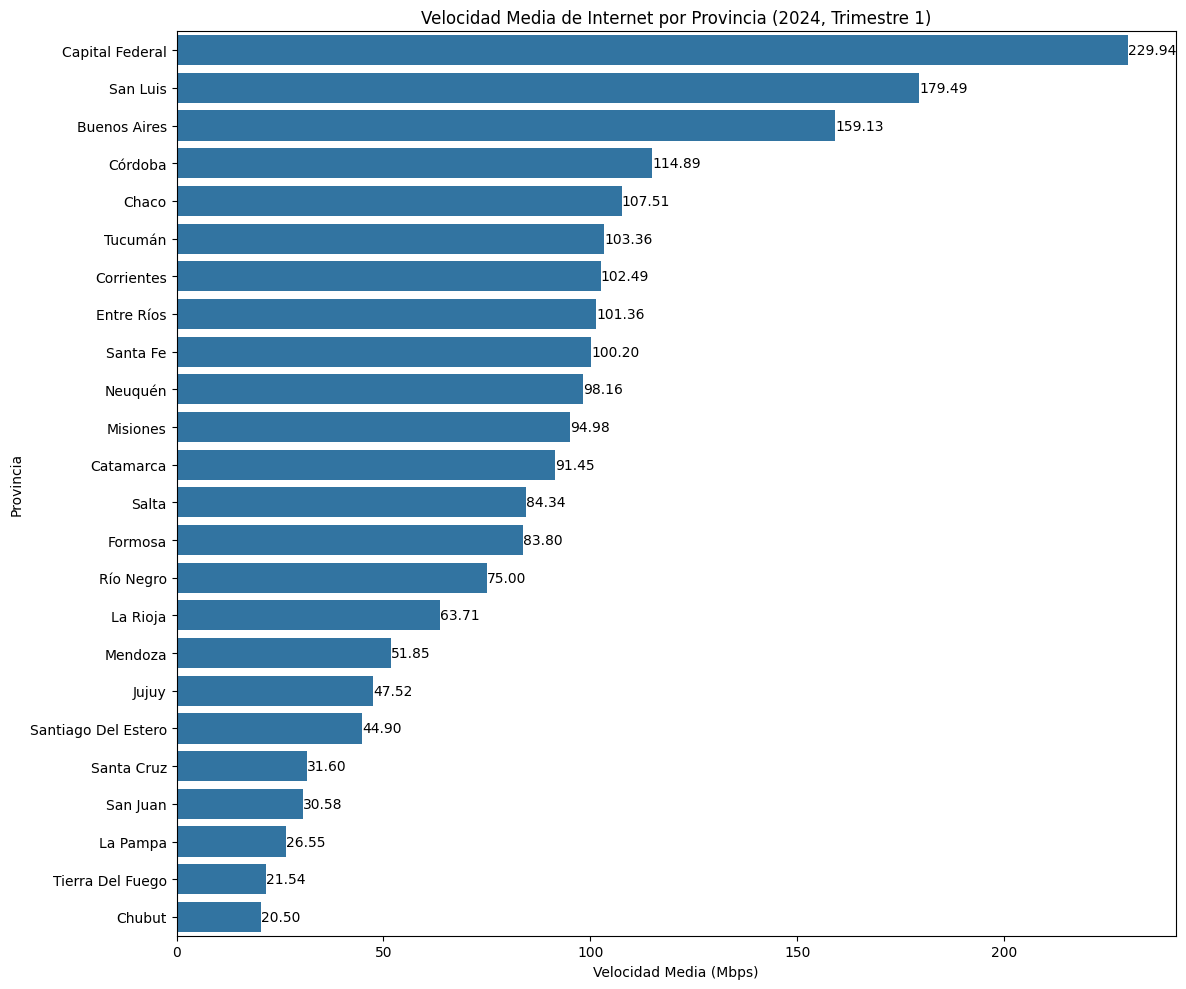

In [18]:
# Filtrar el DataFrame para el año 2024
ultimo_periodo = dfs['Velocidad % por prov'][dfs['Velocidad % por prov']['Año'] == 2024]

# Ordenar el DataFrame por la columna 'Mbps (Media de bajada)' de mayor a menor
ordenado = ultimo_periodo.sort_values(by='Mbps (Media de bajada)', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 10))
sns.barplot(data=ordenado, y='Provincia', x='Mbps (Media de bajada)', orient='h')
plt.title('Velocidad Media de Internet por Provincia (2024, Trimestre 1)')
plt.xlabel('Velocidad Media (Mbps)')
plt.ylabel('Provincia')

# Añadir etiquetas con los valores
for index, value in enumerate(ordenado['Mbps (Media de bajada)']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

Mapa de calor de la evolución de velocidades por provincia:

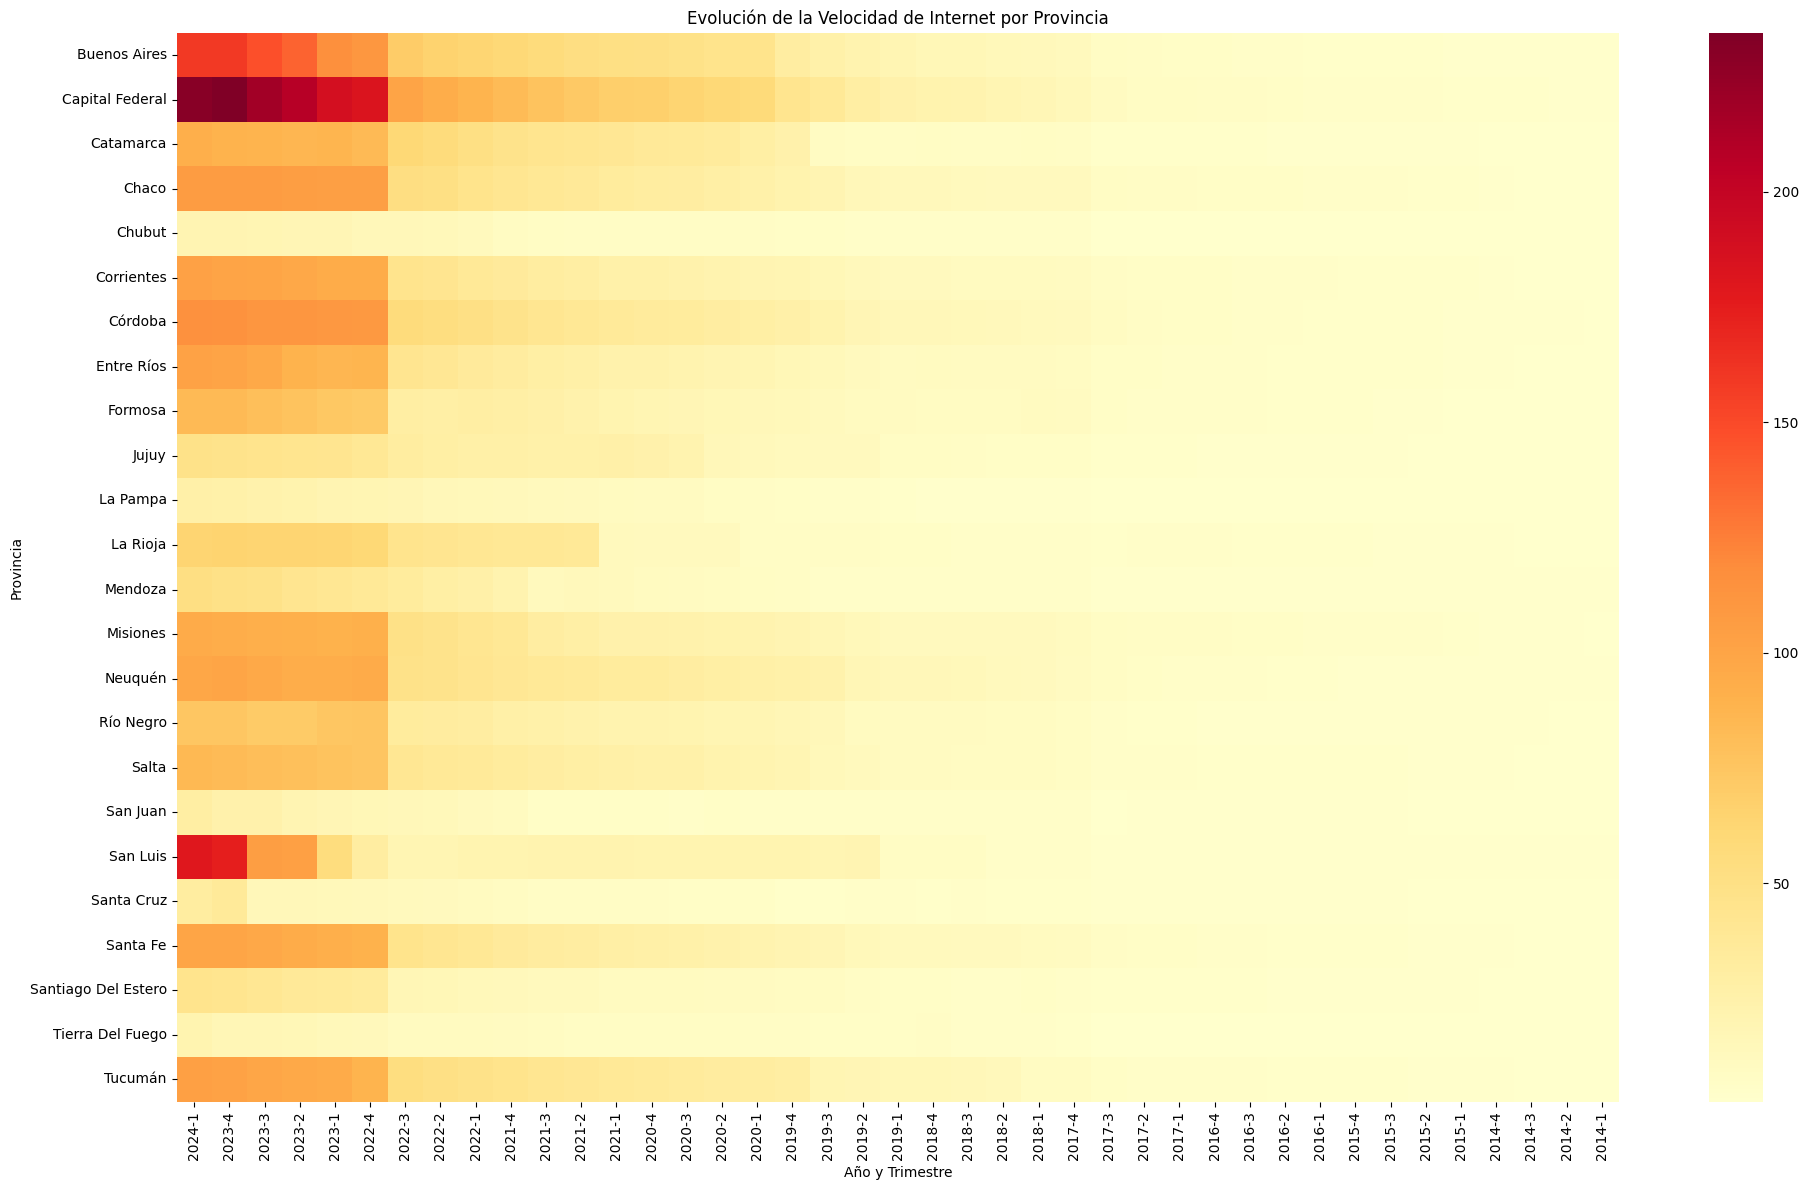

In [19]:
# Primero, vamos a pivotar los datos para que estén en el formato correcto
pivot_df = dfs['Velocidad % por prov'].pivot(index='Provincia', columns=['Año', 'Trimestre'], values='Mbps (Media de bajada)')

# Ahora creamos el mapa de calor
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_df, cmap='YlOrRd', annot=False)
plt.title('Evolución de la Velocidad de Internet por Provincia')
plt.xlabel('Año y Trimestre')
plt.ylabel('Provincia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Análisis de disparidad:



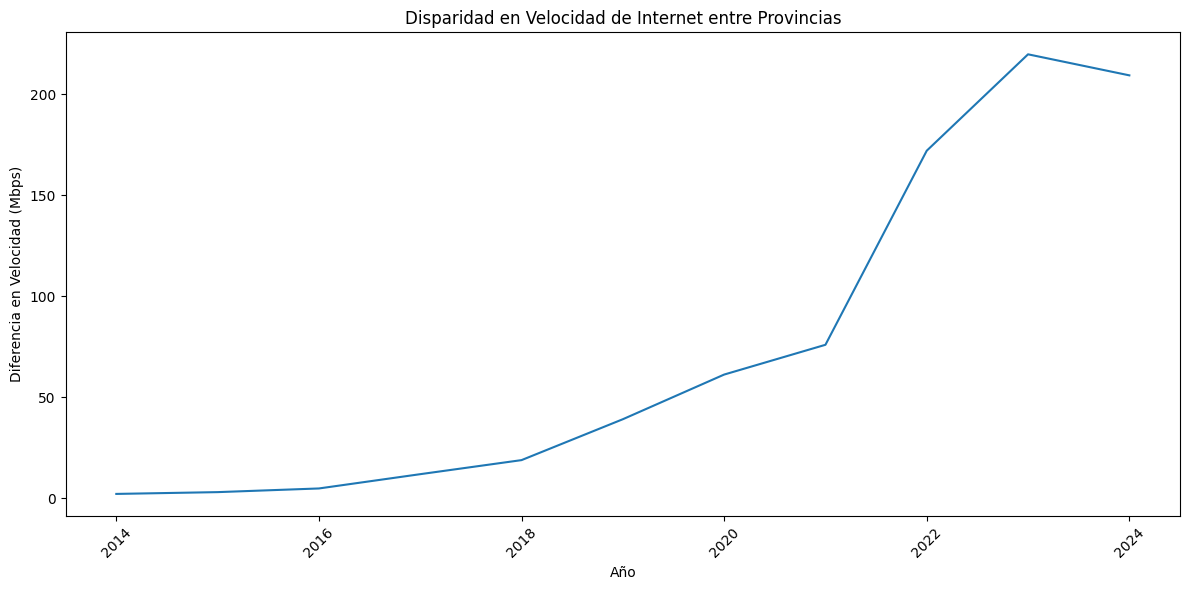

In [20]:
disparidad = dfs['Velocidad % por prov'].groupby('Año').agg({'Mbps (Media de bajada)': ['min', 'max']})
disparidad['Diferencia'] = disparidad[('Mbps (Media de bajada)', 'max')] - disparidad[('Mbps (Media de bajada)', 'min')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=disparidad, x=disparidad.index, y='Diferencia')
plt.title('Disparidad en Velocidad de Internet entre Provincias')
plt.xlabel('Año')
plt.ylabel('Diferencia en Velocidad (Mbps)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tasa de crecimiento por provincia:



C:\Users\54370\AppData\Local\Temp\ipykernel_10692\4211630377.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tasa_crecimiento = dfs['Velocidad % por prov'].groupby('Provincia').apply(calcular_tasa_crecimiento).sort_values(ascending=False)


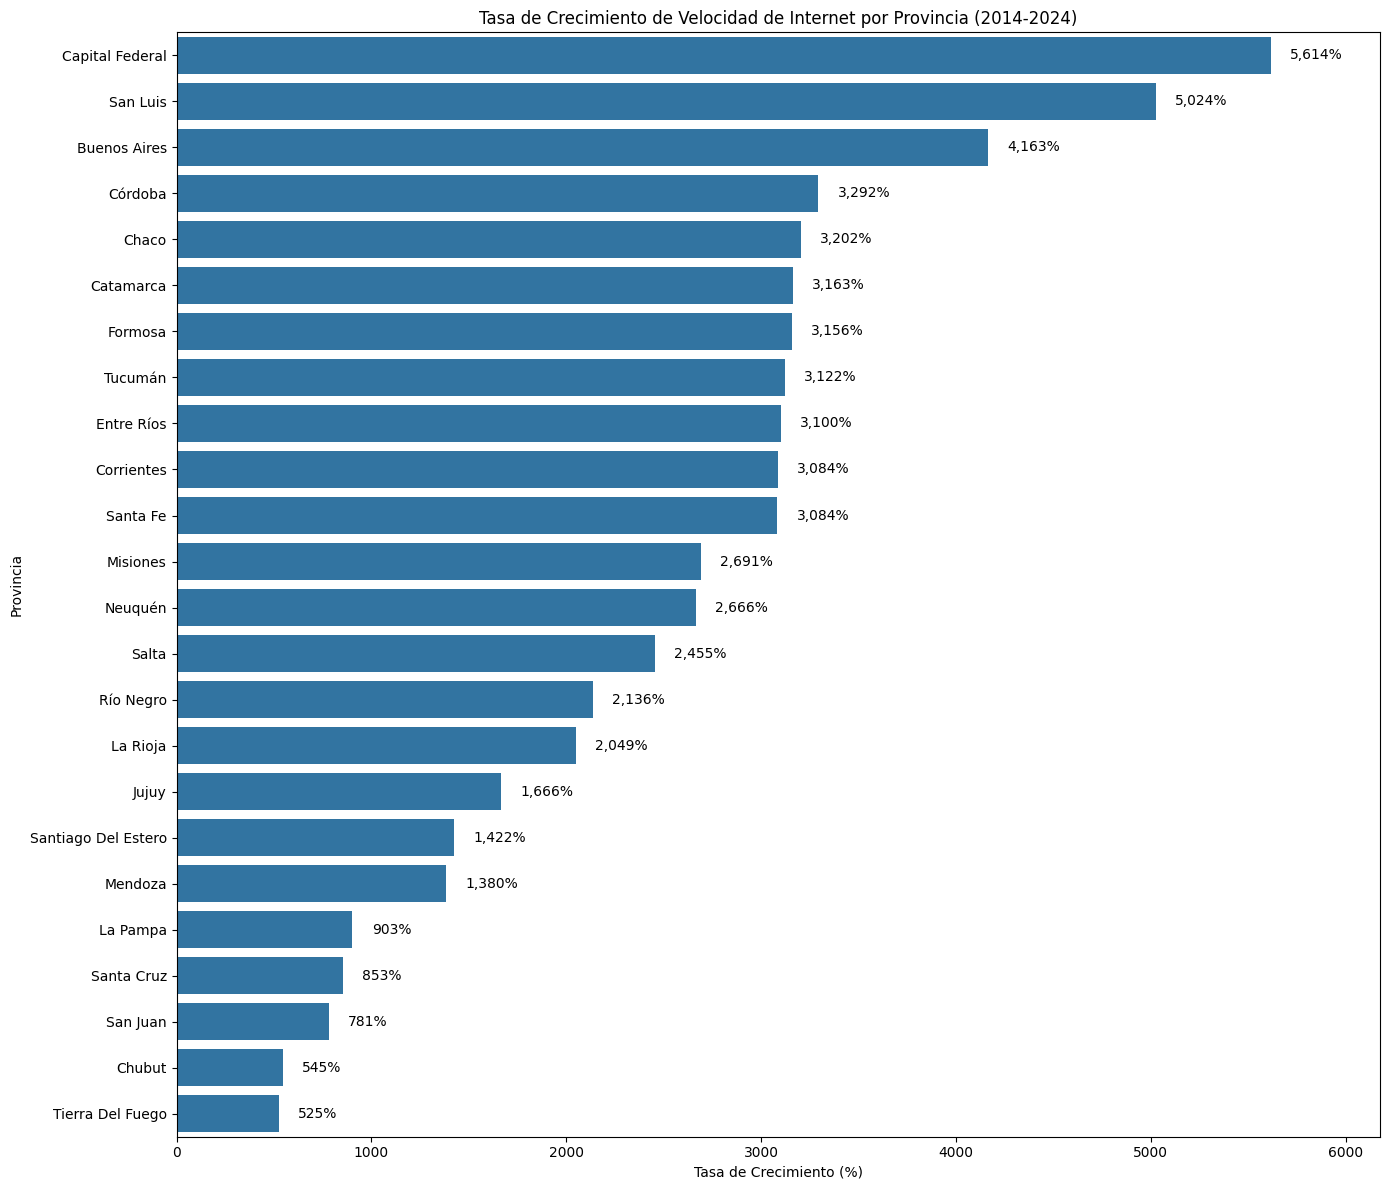

In [21]:
def calcular_tasa_crecimiento(grupo):
    ultimo_valor = grupo.iloc[0]['Mbps (Media de bajada)']  # 2024, Trimestre 1
    primer_valor = grupo.iloc[-1]['Mbps (Media de bajada)']  # 2014, Trimestre 1
    return (ultimo_valor - primer_valor) / primer_valor * 100

tasa_crecimiento = dfs['Velocidad % por prov'].groupby('Provincia').apply(calcular_tasa_crecimiento).sort_values(ascending=False)

plt.figure(figsize=(14, 12))  # Aumentamos un poco el tamaño para que quepa todo
ax = sns.barplot(x=tasa_crecimiento.values, y=tasa_crecimiento.index)

# Añadir etiquetas a las barras
for i, v in enumerate(tasa_crecimiento.values):
    ax.text(v + 100, i, f'{v:,.0f}%', va='center')  # Añadimos etiquetas

plt.title('Tasa de Crecimiento de Velocidad de Internet por Provincia (2014-2024)')
plt.xlabel('Tasa de Crecimiento (%)')
plt.ylabel('Provincia')
plt.xlim(0, max(tasa_crecimiento.values) * 1.1)  # Ajustamos el límite del eje x para que quepan las etiquetas
plt.tight_layout()
plt.show()

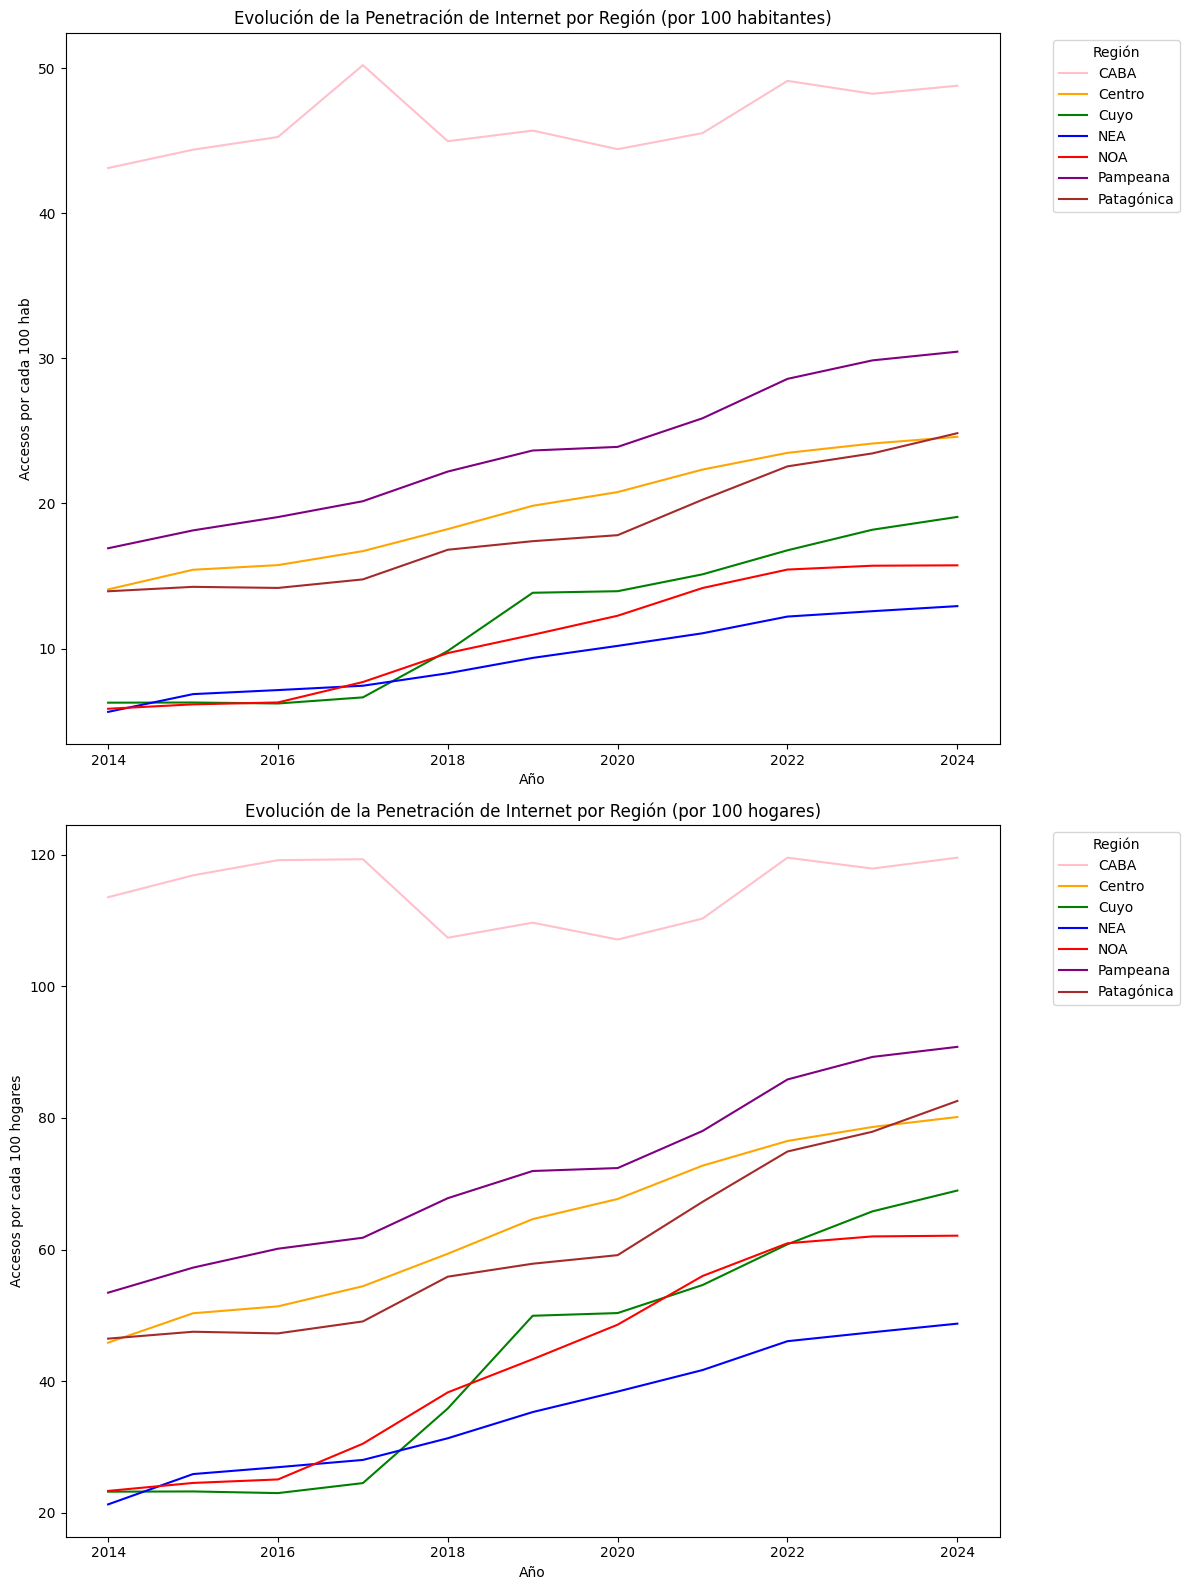

C:\Users\54370\AppData\Local\Temp\ipykernel_10692\3193707038.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ultimo_periodo_pob, y='Provincia', x='Accesos por cada 100 hab', ax=ax1, palette=colors_pob)
C:\Users\54370\AppData\Local\Temp\ipykernel_10692\3193707038.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ultimo_periodo_hog, y='Provincia', x='Accesos por cada 100 hogares', ax=ax2, palette=colors_hog)


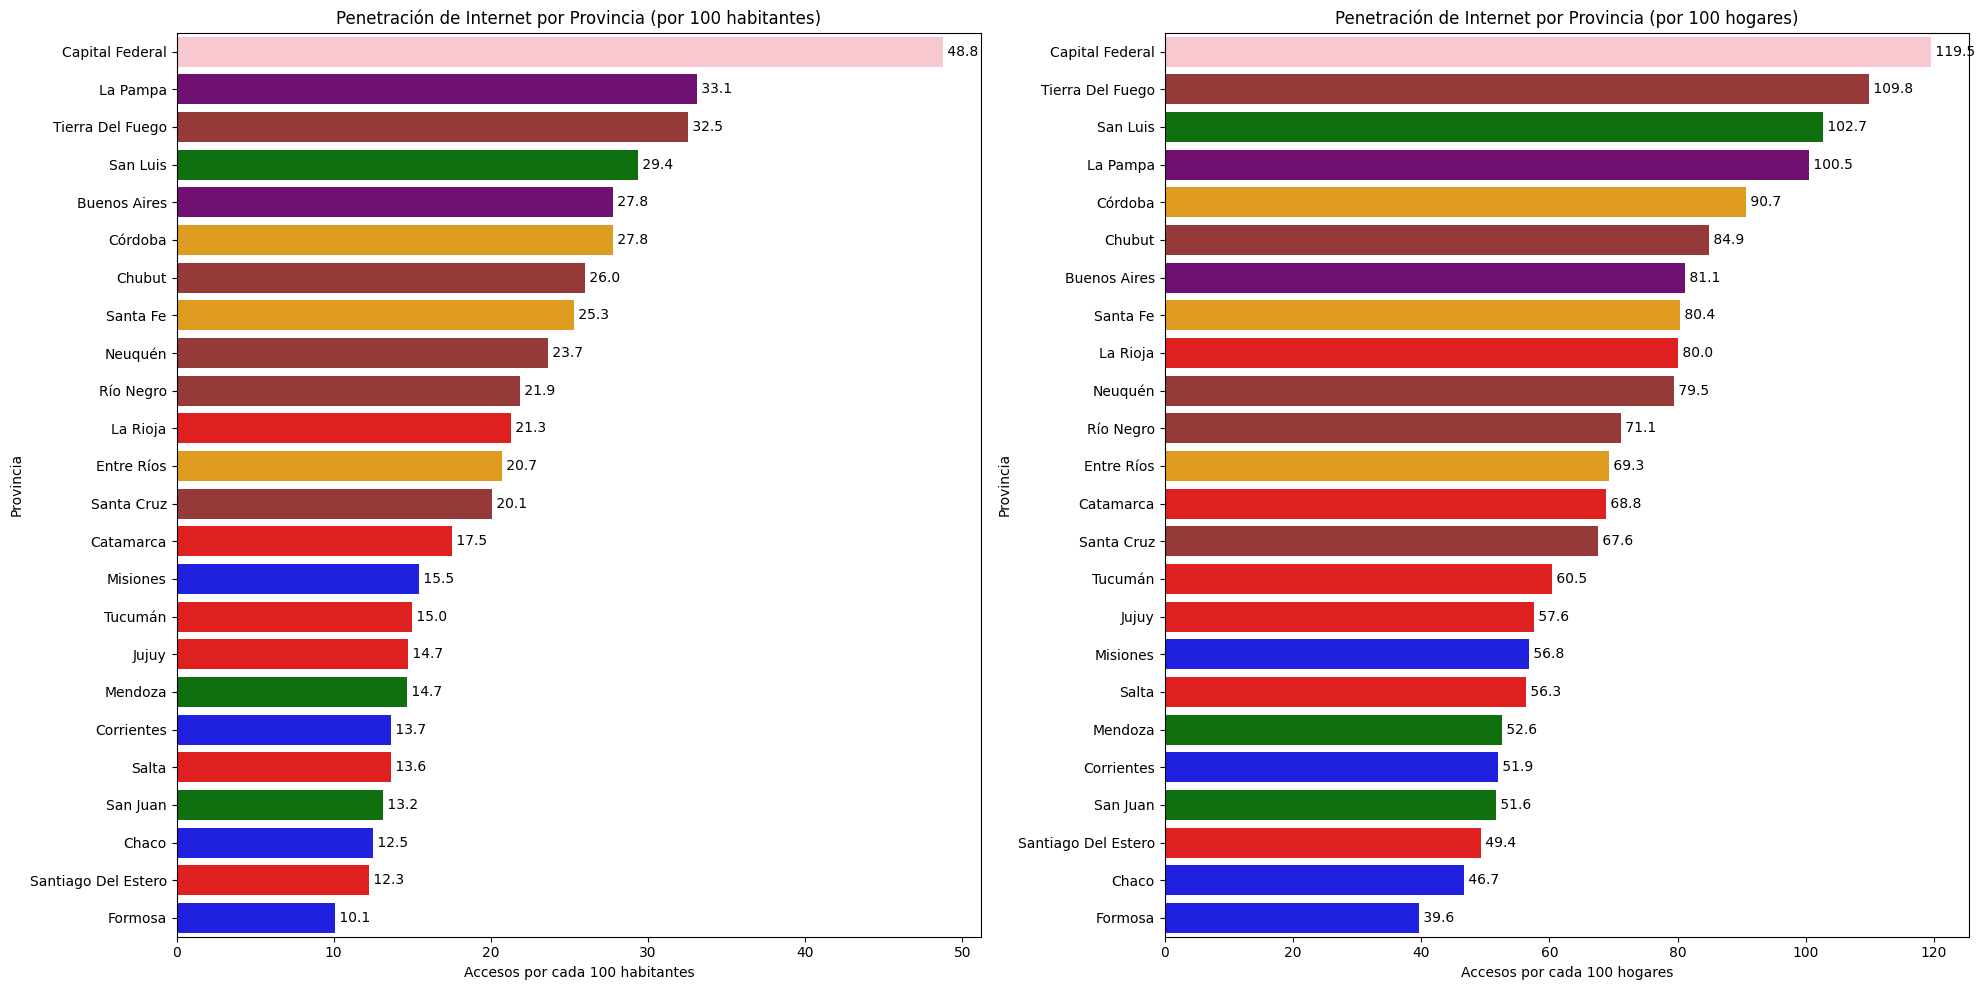

In [22]:
# Definir las regiones y sus colores
regiones = {
    'NOA': ['Jujuy', 'Salta', 'Tucumán', 'Catamarca', 'Santiago Del Estero', 'La Rioja'],
    'NEA': ['Misiones', 'Corrientes', 'Chaco', 'Formosa'],
    'Cuyo': ['San Juan', 'Mendoza', 'San Luis'],
    'Centro': ['Córdoba', 'Santa Fe', 'Entre Ríos'],
    'Pampeana': ['Buenos Aires', 'La Pampa'],
    'Patagónica': ['Río Negro', 'Neuquén', 'Chubut', 'Santa Cruz', 'Tierra Del Fuego'],
    'CABA': ['Capital Federal']
}

# Definir un color para cada región
colores_regiones = {
    'NOA': 'red',
    'NEA': 'blue',
    'Cuyo': 'green',
    'Centro': 'orange',
    'Pampeana': 'purple',
    'Patagónica': 'brown',
    'CABA': 'pink'
}

def agregar_region(df):
    def get_region(provincia):
        for region, provincias in regiones.items():
            if provincia in provincias:
                return region
        return 'Otra'
    
    df['Region'] = df['Provincia'].apply(get_region)
    return df

def plot_by_region(data, x, y, ax, title):
    data = agregar_region(data)
    
    # Calcular la media por región
    region_mean = data.groupby(['Region', 'Año'])[y].mean().reset_index()
    
    # Plotear las líneas por región
    sns.lineplot(data=region_mean, x=x, y=y, hue='Region', palette=colores_regiones, ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel('Año')
    ax.set_ylabel(y)
    ax.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico de líneas por región
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

plot_by_region(dfs['Penetración-poblacion'], 'Año', 'Accesos por cada 100 hab', ax1, 'Evolución de la Penetración de Internet por Región (por 100 habitantes)')
plot_by_region(dfs['Penetracion-hogares'], 'Año', 'Accesos por cada 100 hogares', ax2, 'Evolución de la Penetración de Internet por Región (por 100 hogares)')

plt.tight_layout()
plt.show()

# Función para obtener el color de la región para cada provincia
def get_color(provincia):
    for region, provincias in regiones.items():
        if provincia in provincias:
            return colores_regiones[region]
    return 'gray'  # Color por defecto si no se encuentra la región

# Gráfico de barras por provincia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Población
ultimo_periodo_pob = dfs['Penetración-poblacion'][dfs['Penetración-poblacion']['Año'] == dfs['Penetración-poblacion']['Año'].max()]
ultimo_periodo_pob = ultimo_periodo_pob.sort_values('Accesos por cada 100 hab', ascending=False)

colors_pob = [get_color(provincia) for provincia in ultimo_periodo_pob['Provincia']]
sns.barplot(data=ultimo_periodo_pob, y='Provincia', x='Accesos por cada 100 hab', ax=ax1, palette=colors_pob)
ax1.set_title('Penetración de Internet por Provincia (por 100 habitantes)')
ax1.set_xlabel('Accesos por cada 100 habitantes')

for i, v in enumerate(ultimo_periodo_pob['Accesos por cada 100 hab']):
    ax1.text(v, i, f' {v:.1f}', va='center')

# Hogares
ultimo_periodo_hog = dfs['Penetracion-hogares'][dfs['Penetracion-hogares']['Año'] == dfs['Penetracion-hogares']['Año'].max()]
ultimo_periodo_hog = ultimo_periodo_hog.sort_values('Accesos por cada 100 hogares', ascending=False)

colors_hog = [get_color(provincia) for provincia in ultimo_periodo_hog['Provincia']]
sns.barplot(data=ultimo_periodo_hog, y='Provincia', x='Accesos por cada 100 hogares', ax=ax2, palette=colors_hog)
ax2.set_title('Penetración de Internet por Provincia (por 100 hogares)')
ax2.set_xlabel('Accesos por cada 100 hogares')

for i, v in enumerate(ultimo_periodo_hog['Accesos por cada 100 hogares']):
    ax2.text(v, i, f' {v:.1f}', va='center')

plt.tight_layout()
plt.show()

### Análisis Temporal y Geográfico de Internet en Argentina (2014-2024)

#### Disparidad en el Desarrollo de Infraestructura

1. Se observa una marcada diferencia en la calidad y velocidad del servicio de internet entre las distintas provincias y regiones de Argentina.

2. La velocidad media de internet ha aumentado significativamente, pasando de 3.62 Mbps en 2014 a 139.15 Mbps en 2024, lo que representa un crecimiento del 3,744% en una década.

3. Sin embargo, este crecimiento no ha sido uniforme en todas las regiones del país.

#### Diferencias Regionales

1. **CABA (Ciudad Autónoma de Buenos Aires)**: Lidera en términos de velocidad y penetración de internet, con una velocidad media de 229.94 Mbps en 2024.

2. **Región Pampeana**: Sigue a CABA en desarrollo de infraestructura, con Buenos Aires alcanzando 159.13 Mbps en 2024.

3. **Región Centro**: Muestra un desarrollo significativo, aunque menor que CABA y la región Pampeana.

4. **NOA (Noroeste Argentino) y NEA (Noreste Argentino)**: Estas regiones muestran un retraso considerable en comparación con las áreas más desarrolladas.

#### Factores Influyentes

1. **Desarrollo Económico**: Las regiones más desarrolladas económicamente tienden a tener mejor infraestructura de internet.

2. **Urbanización**: Las áreas urbanas generalmente disfrutan de mejores servicios de internet que las zonas rurales.

3. **Políticas Regionales**: Las diferencias en políticas de desarrollo tecnológico entre provincias pueden influir en la calidad del servicio.

4. **Inversión en Infraestructura**: La disparidad en la inversión en infraestructura de telecomunicaciones entre regiones es evidente en los resultados.

#### Evolución Temporal

1. Todas las regiones han experimentado mejoras en la velocidad de internet desde 2014.

2. El crecimiento más rápido se observa a partir de 2017, con una aceleración notable en los últimos años.

3. La brecha entre las regiones más desarrolladas y las menos desarrolladas ha aumentado con el tiempo.

#### Implicaciones

1. **Brecha Digital**: Existe una clara brecha digital entre las diferentes regiones de Argentina, lo que puede tener implicaciones en educación, economía y desarrollo social.

2. **Desafíos de Equidad**: Se necesitan políticas específicas para abordar la disparidad en el acceso y la calidad de internet entre regiones.

3. **Oportunidades de Crecimiento**: Las regiones menos desarrolladas presentan oportunidades significativas para la expansión y mejora de servicios de internet.

### Conclusión

El análisis revela un crecimiento impresionante en la velocidad de internet en Argentina durante la última década, pero también destaca importantes desigualdades regionales. Abordar estas disparidades será crucial para asegurar un desarrollo digital equitativo en todo el país.

### 2. Análisis de tecnologías:

1. Evolución de tecnologías a nivel nacional:

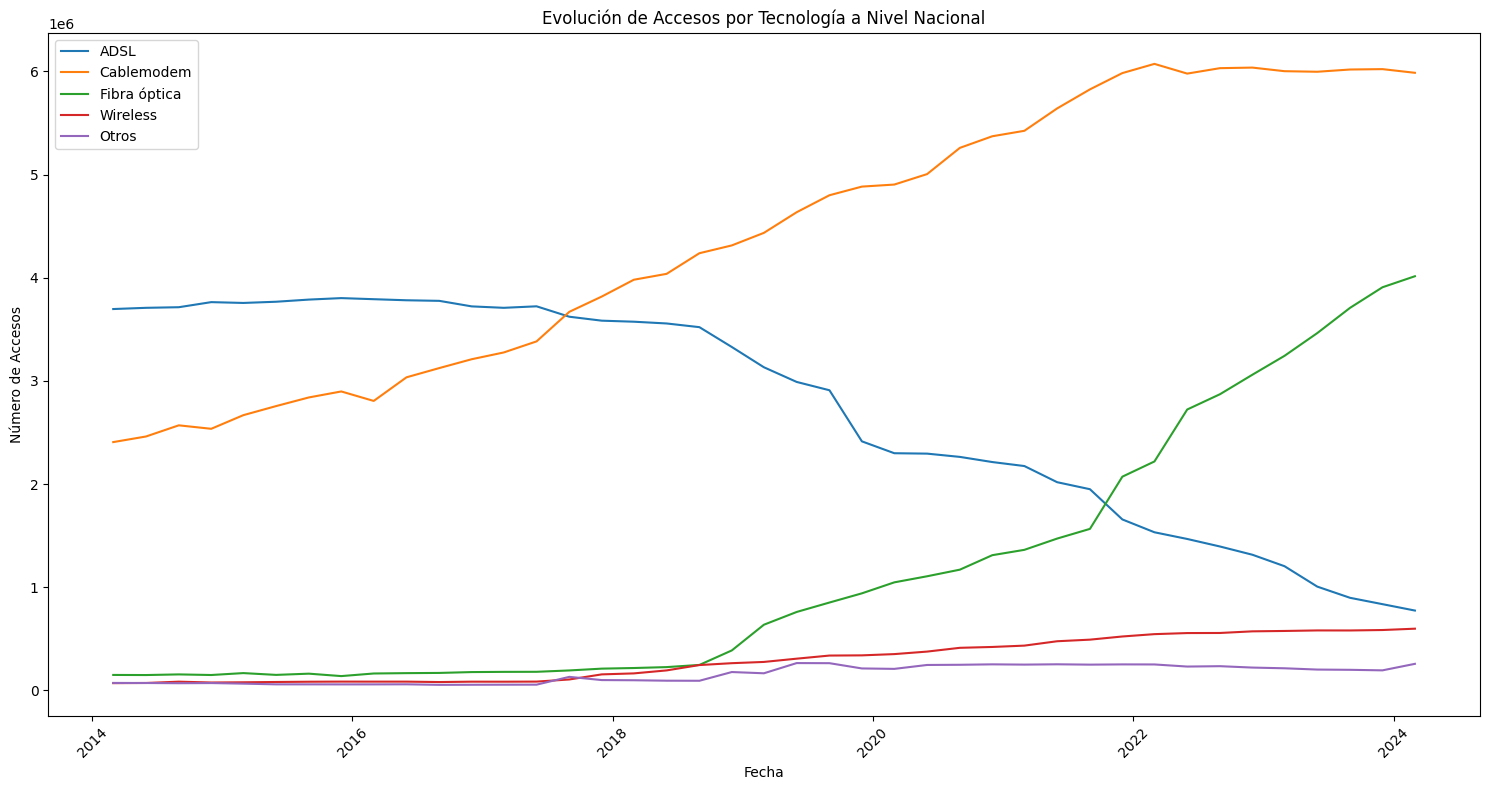

<Figure size 1500x800 with 0 Axes>

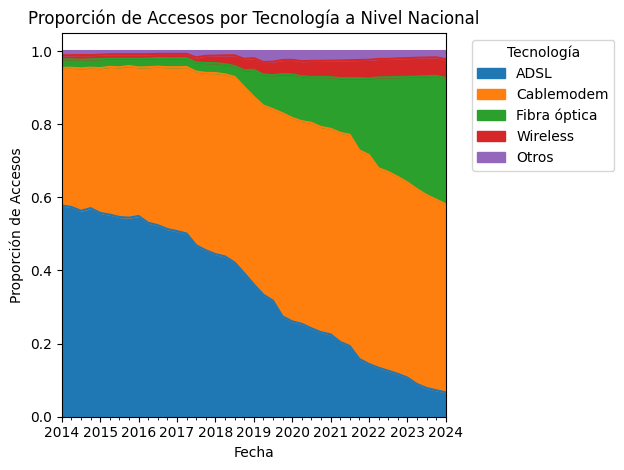

In [23]:
# Preparar los datos
df_totales = dfs['Totales Accesos Por Tecnología']
df_totales['Fecha'] = pd.to_datetime(df_totales['Año'].astype(str) + '-' + (df_totales['Trimestre']*3).astype(str) + '-01')
df_totales = df_totales.set_index('Fecha')
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Crear el gráfico
plt.figure(figsize=(15, 8))
for tech in tecnologias:
    plt.plot(df_totales.index, df_totales[tech], label=tech)

plt.title('Evolución de Accesos por Tecnología a Nivel Nacional')
plt.xlabel('Fecha')
plt.ylabel('Número de Accesos')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de área apilada para mostrar la proporción de cada tecnología
df_prop = df_totales[tecnologias].div(df_totales[tecnologias].sum(axis=1), axis=0)
plt.figure(figsize=(15, 8))
df_prop.plot.area(stacked=True)
plt.title('Proporción de Accesos por Tecnología a Nivel Nacional')
plt.xlabel('Fecha')
plt.ylabel('Proporción de Accesos')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2. Evolución de tecnologías por provincia:

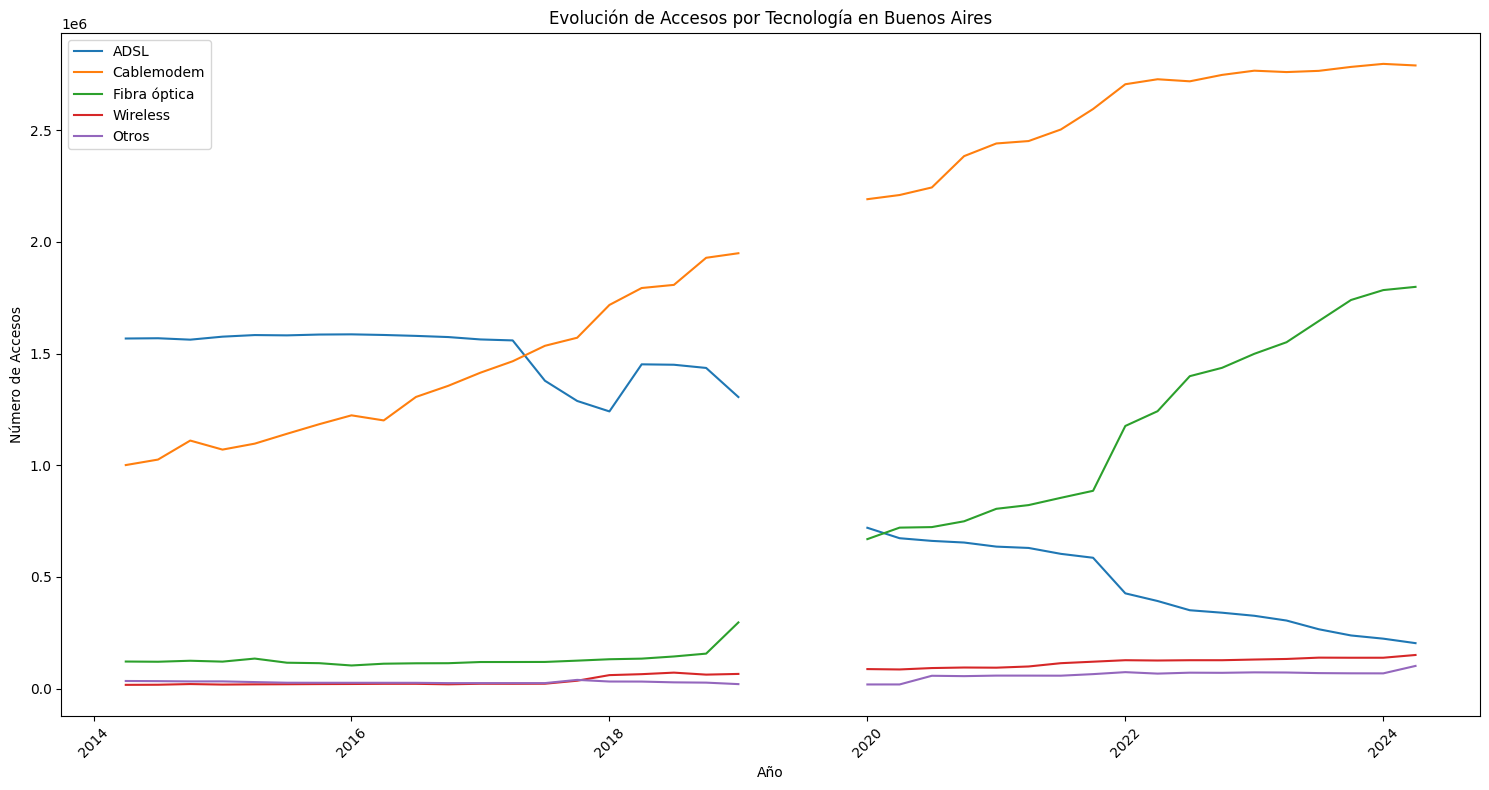

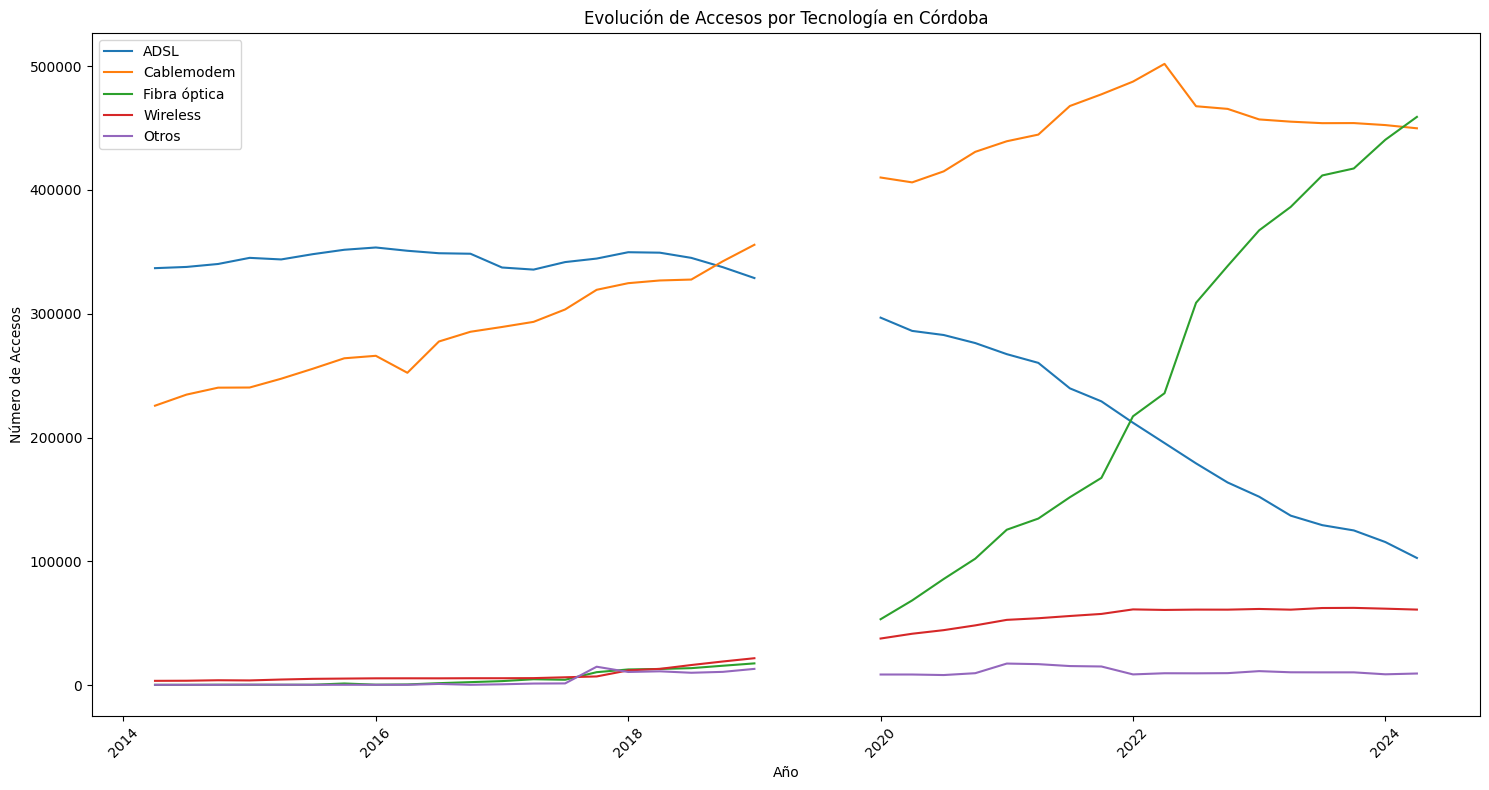

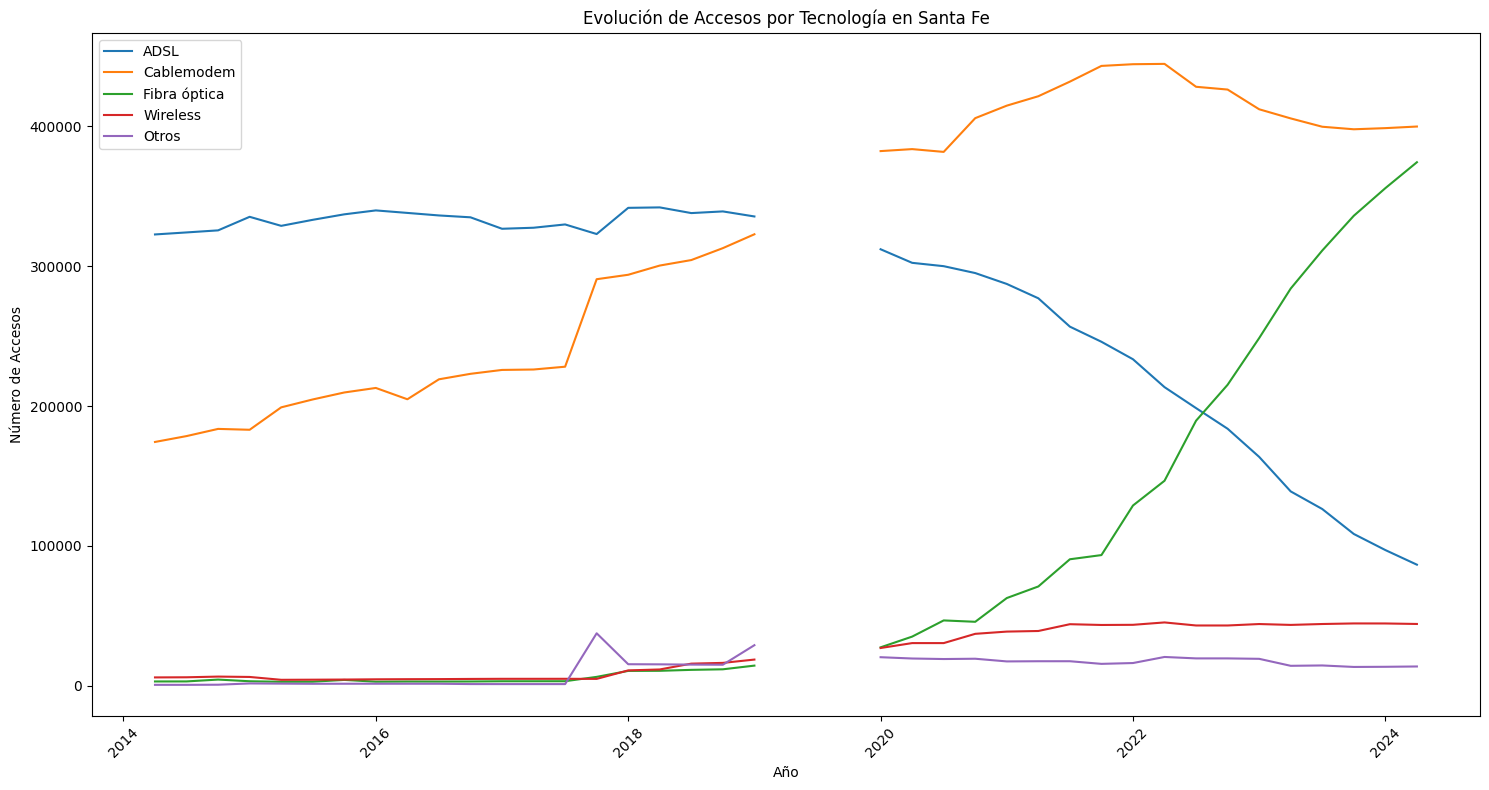

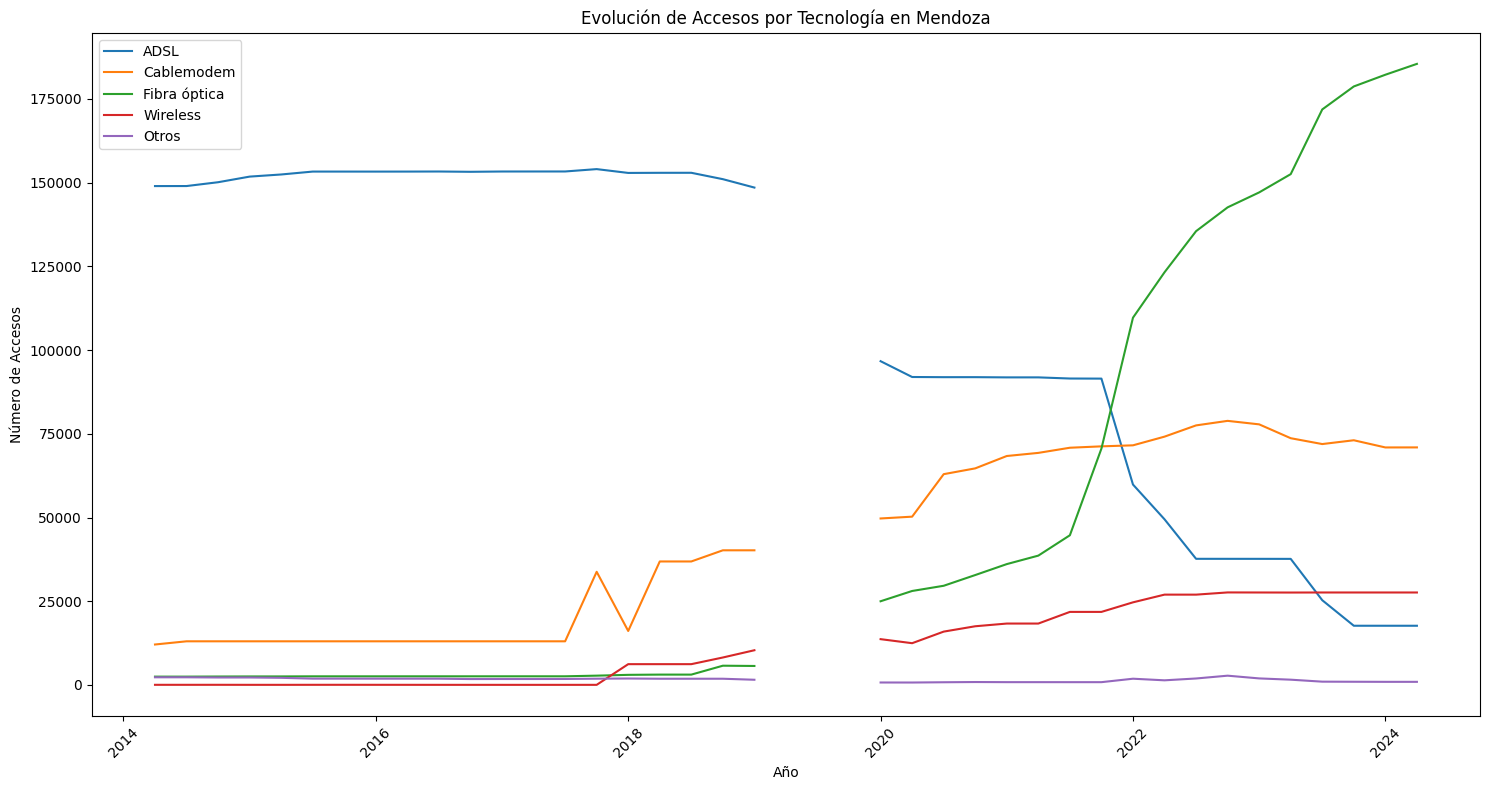

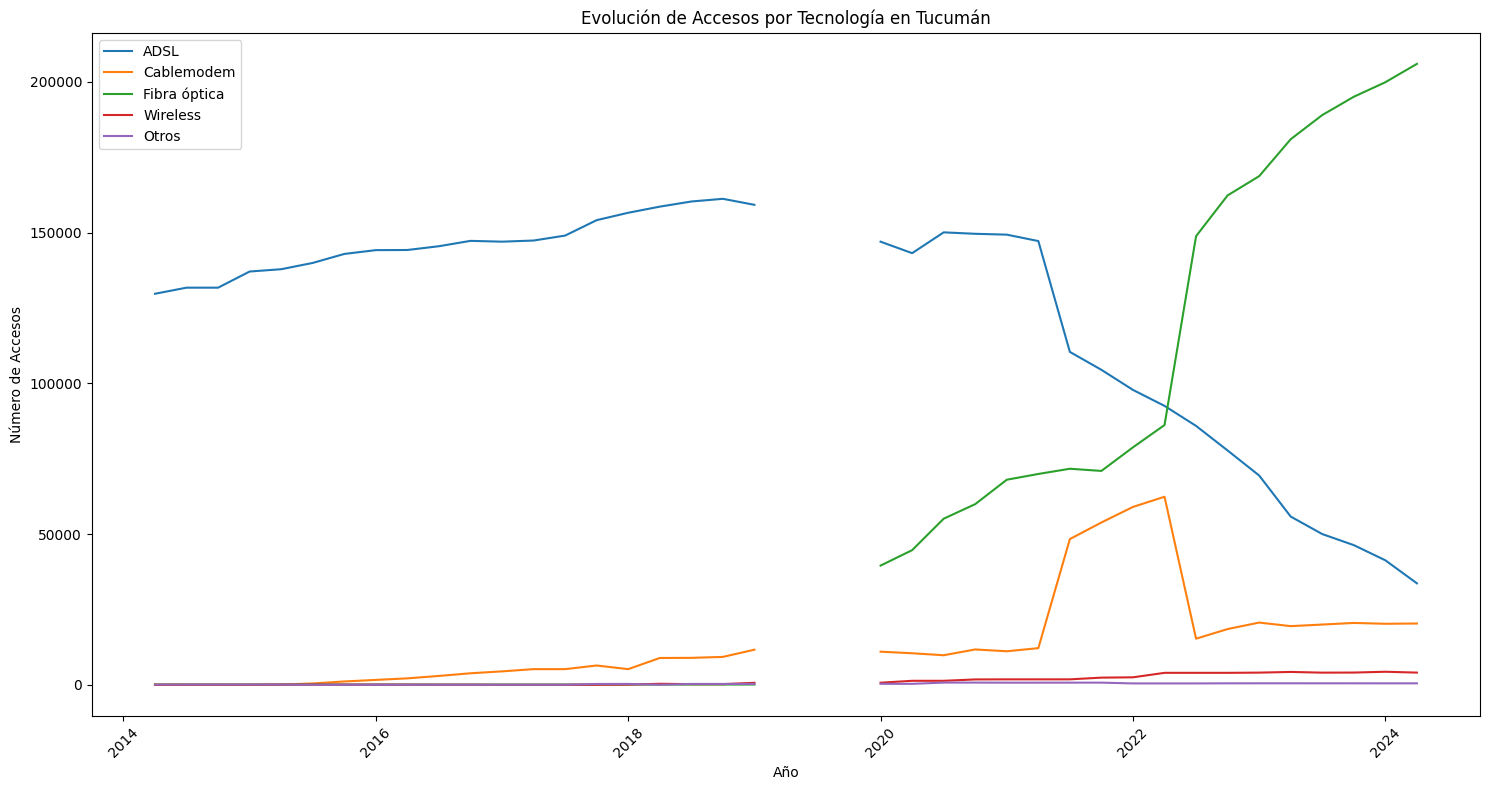

In [24]:
# Preparar los datos
df_prov = dfs['Accesos Por Tecnología']
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Asegurarnos de que 'Año' y 'Trimestre' son numéricos
df_prov['Año'] = pd.to_numeric(df_prov['Año'], errors='coerce')
df_prov['Trimestre'] = pd.to_numeric(df_prov['Trimestre'], errors='coerce')

# Función para crear gráfico por provincia
def plot_technology_evolution(provincia):
    df_provincia = df_prov[df_prov['Provincia'] == provincia]
    
    plt.figure(figsize=(15, 8))
    for tech in tecnologias:
        plt.plot(df_provincia['Año'] + df_provincia['Trimestre']/4, df_provincia[tech], label=tech)
    
    plt.title(f'Evolución de Accesos por Tecnología en {provincia}')
    plt.xlabel('Año')
    plt.ylabel('Número de Accesos')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ejemplo: graficar para algunas provincias
provincias_ejemplo = ['Buenos Aires', 'Córdoba', 'Santa Fe', 'Mendoza', 'Tucumán']
for prov in provincias_ejemplo:
    plot_technology_evolution(prov)


In [25]:
dfs['Accesos Por Tecnología'].isnull().sum()

Año             74
Trimestre       74
Provincia        2
ADSL             2
Cablemodem       2
Fibra óptica     2
Wireless         2
Otros            2
Total            2
dtype: int64

In [26]:
# Filtra las filas donde el año sea 2019
filtered_df = dfs['Accesos Por Tecnología'][dfs['Accesos Por Tecnología']['Año'] == 2021]

# Imprime las filas filtradas
print(filtered_df.head())
print(filtered_df.tail())

      Año  Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
216  2021          4     Buenos Aires  426325.0   2706506.0     1176024.0   
217  2021          4  Capital Federal  111360.0   1205128.0       60005.0   
218  2021          4        Catamarca   16385.0     13858.0       25100.0   
219  2021          4            Chaco   35548.0     63145.0       34688.0   
220  2021          4           Chubut   46361.0     57412.0        9655.0   

     Wireless    Otros      Total  
216  126887.0  73415.0  4509157.0  
217    5679.0  29947.0  1412119.0  
218    1512.0   2235.0    59090.0  
219    8005.0   2359.0   143745.0  
220   28041.0  18839.0   160308.0  
      Año  Trimestre            Provincia      ADSL  Cablemodem  Fibra óptica  \
307  2021          1           Santa Cruz   12347.0     23089.0        5975.0   
308  2021          1             Santa Fe  277012.0    421480.0       70976.0   
309  2021          1  Santiago Del Estero   26468.0     75849.0         570.0 

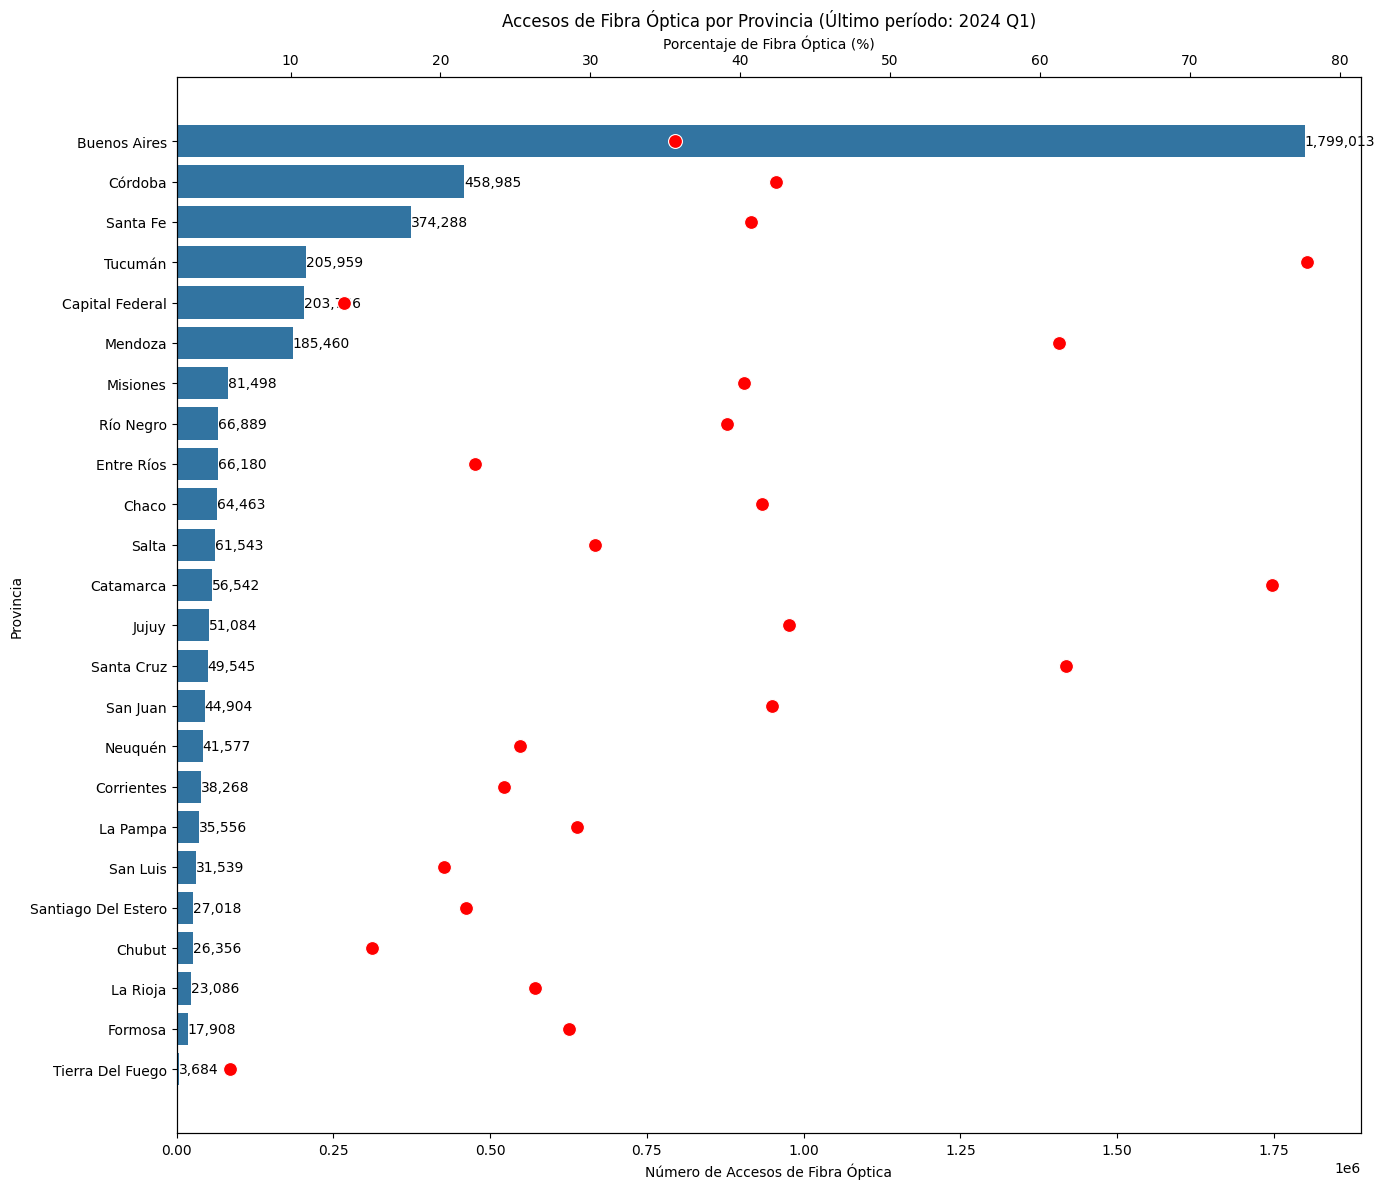

Período analizado: Año 2024, Trimestre 1
Provincia con más accesos de Fibra Óptica: Buenos Aires (1,799,013 accesos)
Provincia con menos accesos de Fibra Óptica: Tierra Del Fuego (3,684 accesos)
Promedio de accesos de Fibra Óptica por provincia: 167,296
Mediana de accesos de Fibra Óptica por provincia: 53,813


In [27]:
# Asumiendo que df_prov es tu DataFrame de 'Accesos Por Tecnología'

# Obtener el último período
ultimo_anio = df_prov['Año'].max()
ultimo_trimestre = df_prov[df_prov['Año'] == ultimo_anio]['Trimestre'].max()

ultimo_periodo = df_prov[(df_prov['Año'] == ultimo_anio) & (df_prov['Trimestre'] == ultimo_trimestre)]
ultimo_periodo = ultimo_periodo.sort_values('Fibra óptica', ascending=False)

# Calcular el porcentaje de fibra óptica sobre el total de accesos
ultimo_periodo['Porcentaje_FO'] = ultimo_periodo['Fibra óptica'] / ultimo_periodo['Total'] * 100

plt.figure(figsize=(14, 12))
ax = sns.barplot(data=ultimo_periodo, y='Provincia', x='Fibra óptica')

# Añadir etiquetas de valor a las barras
for i, v in enumerate(ultimo_periodo['Fibra óptica']):
    ax.text(v + 0.1, i, f'{v:,.0f}', va='center')

# Añadir una segunda serie para mostrar el porcentaje
ax2 = ax.twiny()
sns.scatterplot(data=ultimo_periodo, y='Provincia', x='Porcentaje_FO', ax=ax2, color='red', s=100)

# Configurar los ejes
ax.set_xlabel('Número de Accesos de Fibra Óptica')
ax2.set_xlabel('Porcentaje de Fibra Óptica (%)')

plt.title(f'Accesos de Fibra Óptica por Provincia (Último período: {ultimo_anio} Q{ultimo_trimestre})')
plt.tight_layout()
plt.show()

# Imprimir estadísticas adicionales
print(f"Período analizado: Año {ultimo_anio}, Trimestre {ultimo_trimestre}")
print(f"Provincia con más accesos de Fibra Óptica: {ultimo_periodo.iloc[0]['Provincia']} ({ultimo_periodo.iloc[0]['Fibra óptica']:,.0f} accesos)")
print(f"Provincia con menos accesos de Fibra Óptica: {ultimo_periodo.iloc[-1]['Provincia']} ({ultimo_periodo.iloc[-1]['Fibra óptica']:,.0f} accesos)")
print(f"Promedio de accesos de Fibra Óptica por provincia: {ultimo_periodo['Fibra óptica'].mean():,.0f}")
print(f"Mediana de accesos de Fibra Óptica por provincia: {ultimo_periodo['Fibra óptica'].median():,.0f}")

### Evolución de Tecnologías de Internet en Argentina (2014-2024)

#### Tendencias Principales

1. **Transición Tecnológica Nacional:**
   - Declive significativo de ADSL desde 2014.
   - Auge del Cablemodem como tecnología dominante desde 2018.
   - Crecimiento exponencial de la Fibra Óptica desde 2019, superando al ADSL en 2022.

2. **Distribución de Tecnologías:**
   - 2014: Predominio de ADSL y Cablemodem.
   - 2024: Liderazgo de Cablemodem y Fibra Óptica, con ADSL en declive.

3. **Variaciones Regionales:**
   - Buenos Aires y Córdoba: Patrones similares al nacional.
   - Mendoza y Tucumán: Adopción acelerada de Fibra Óptica, superando otras tecnologías.

4. **Disparidad en Adopción de Fibra Óptica:**
   - Concentración en provincias más pobladas (Buenos Aires, Córdoba, Santa Fe).
   - Menor penetración en provincias menos pobladas o remotas.

#### Observaciones Adicionales

- **Wireless y Otras Tecnologías:** No varia mucho su penetración, es constante, indicando nichos específicos de mercado.
- **Brecha Tecnológica:** Evidente entre provincias centrales y periféricas, reflejando desigualdades en infraestructura.
- **Velocidad de Transición:** Varía significativamente entre provincias, sugiriendo diferentes niveles de inversión y políticas de desarrollo.

#### Implicaciones

1. **Mejora en Calidad de Servicio:** La transición hacia Fibra Óptica y Cablemodem implica un aumento general en la velocidad y calidad de conexiones.
2. **Desafíos de Equidad:** Necesidad de políticas focalizadas para reducir la brecha digital entre regiones.
3. **Oportunidades de Mercado:** Potencial de crecimiento en áreas con baja penetración de tecnologías avanzadas.
4. **Obsolescencia Tecnológica:** Necesidad de estrategias para la transición de usuarios de ADSL a tecnologías más modernas.

### Conclusión

La evolución tecnológica del internet en Argentina muestra un claro patrón de modernización, con un rápido crecimiento de tecnologías más avanzadas como la Fibra Óptica. Sin embargo, esta evolución no es uniforme en todo el país, evidenciando desafíos persistentes en términos de equidad digital y desarrollo de infraestructura. El futuro del sector dependerá de cómo se aborden estas disparidades y se fomente la adopción de tecnologías de alta velocidad en todas las regiones.

### 3. Análisis de velocidades

Columnas de velocidad encontradas: ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps']


C:\Users\54370\AppData\Local\Temp\ipykernel_10692\3148122266.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_total['Fecha'] = pd.to_datetime(df_total['Año'].astype(str) + 'Q' + df_total['Trimestre'].astype(str))


<Figure size 1500x800 with 0 Axes>

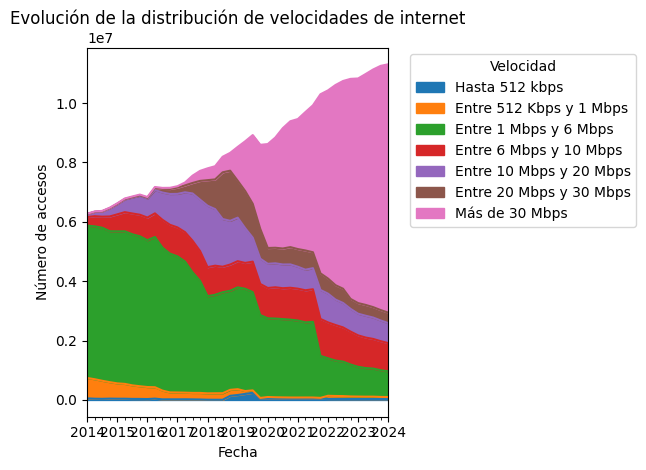

Columnas de velocidad encontradas en df_prov: ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']


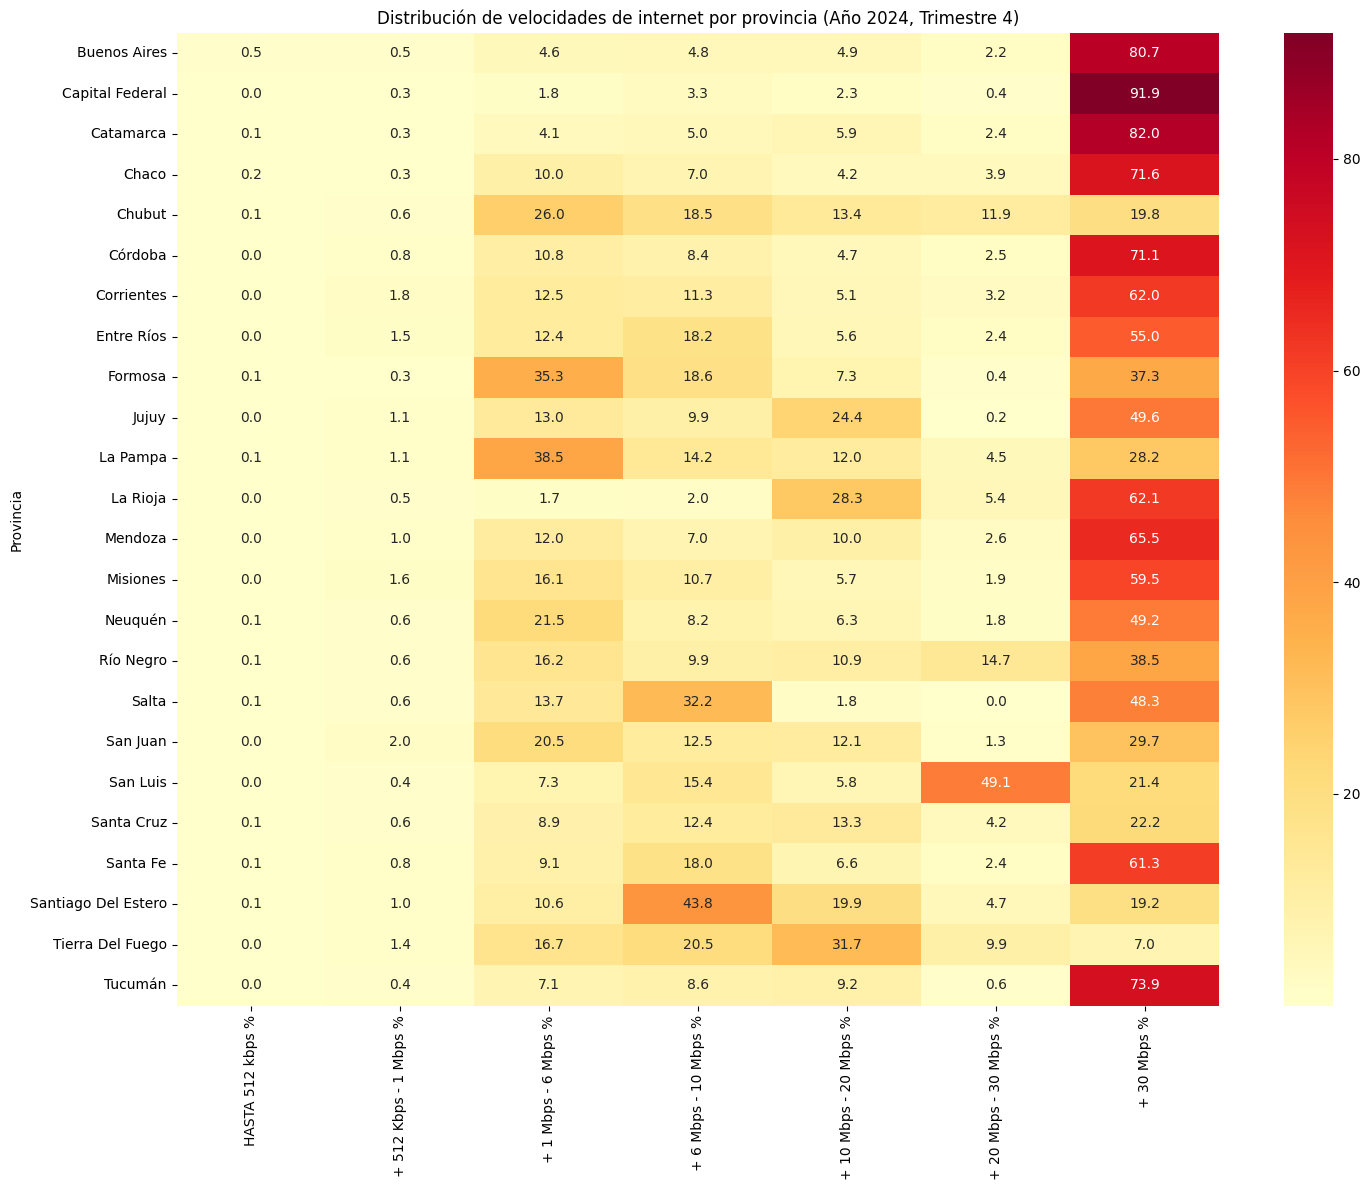

<Figure size 1500x800 with 0 Axes>

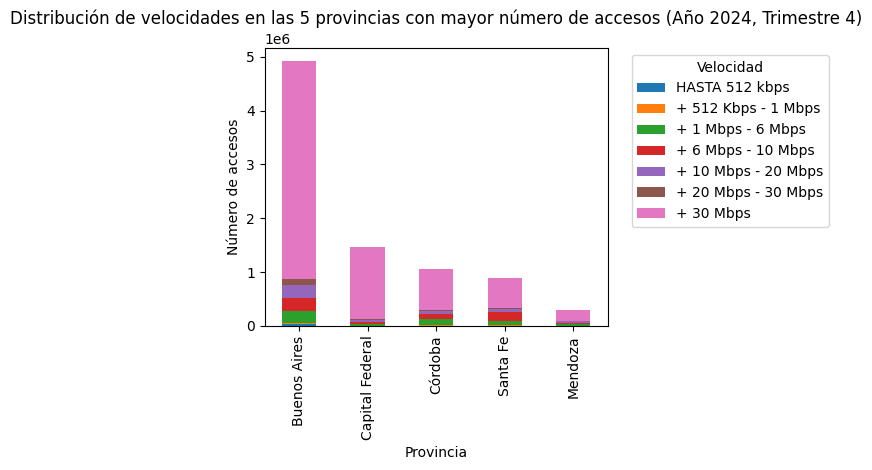

In [28]:
# 1. Análisis de la tendencia general de velocidades
df_total = dfs['Totales Accesos por velocidad']

# Convertir el año y trimestre a una fecha
df_total['Fecha'] = pd.to_datetime(df_total['Año'].astype(str) + 'Q' + df_total['Trimestre'].astype(str))

# Identificar las columnas de velocidad
velocidades = [col for col in df_total.columns if 'bps' in col.lower() or 'mbps' in col.lower()]

print("Columnas de velocidad encontradas:", velocidades)

# Crear el gráfico de área apilada
plt.figure(figsize=(15, 8))
df_total.set_index('Fecha')[velocidades].plot(kind='area', stacked=True)
plt.title('Evolución de la distribución de velocidades de internet')
plt.xlabel('Fecha')
plt.ylabel('Número de accesos')
plt.legend(title='Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Análisis de la distribución de velocidades por provincia
df_prov = dfs['Accesos por velocidad']

# Identificar las columnas de velocidad en df_prov
velocidades_prov = [col for col in df_prov.columns if 'bps' in col.lower() or 'mbps' in col.lower()]

print("Columnas de velocidad encontradas en df_prov:", velocidades_prov)

# Seleccionar el último período disponible
ultimo_periodo = df_prov[df_prov['Año'] == df_prov['Año'].max()]
ultimo_periodo = ultimo_periodo[ultimo_periodo['Trimestre'] == ultimo_periodo['Trimestre'].max()]

# Calcular el porcentaje de cada velocidad por provincia
for velocidad in velocidades_prov:
    ultimo_periodo[f'{velocidad} %'] = ultimo_periodo[velocidad] / ultimo_periodo['Total'] * 100

# Crear un heatmap de la distribución de velocidades por provincia
plt.figure(figsize=(15, 12))
sns.heatmap(ultimo_periodo.set_index('Provincia')[[f'{v} %' for v in velocidades_prov]], 
            cmap='YlOrRd', annot=True, fmt='.1f')
plt.title(f'Distribución de velocidades de internet por provincia (Año {ultimo_periodo["Año"].iloc[0]}, Trimestre {ultimo_periodo["Trimestre"].iloc[0]})')
plt.tight_layout()
plt.show()

# 3. Gráfico de barras apiladas para las 5 provincias con mayor penetración
top_5_provincias = ultimo_periodo.nlargest(5, 'Total')

plt.figure(figsize=(15, 8))
top_5_provincias.set_index('Provincia')[velocidades_prov].plot(kind='bar', stacked=True)
plt.title(f'Distribución de velocidades en las 5 provincias con mayor número de accesos (Año {ultimo_periodo["Año"].iloc[0]}, Trimestre {ultimo_periodo["Trimestre"].iloc[0]})')
plt.xlabel('Provincia')
plt.ylabel('Número de accesos')
plt.legend(title='Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Análisis de Velocidades de Internet en Argentina (2014-2024)

## Tendencias Principales

1. **Aumento Significativo de Altas Velocidades**
   - Predominio de conexiones de más de 30 Mbps en 2024.
   - Refleja la adopción masiva de tecnologías como fibra óptica y cable módem.

2. **Evolución Temporal**
   - Transición clara desde velocidades bajas y medias hacia altas velocidades.
   - Disminución constante de conexiones de menos de 6 Mbps desde 2014.

3. **Disparidad Geográfica**
   - Provincias más pobladas lideran en adopción de altas velocidades.
   - Algunas provincias menos pobladas muestran rezago en la transición.

## Observaciones Detalladas

### Distribución Nacional
- Más del 50% de las conexiones superan los 30 Mbps en la mayoría de las provincias.
- Capital Federal y Buenos Aires muestran los porcentajes más altos de conexiones de alta velocidad.

### Casos Particulares
- Chubut, Formosa, La Pampa, Santiago del Estero y Tierra del Fuego: Menor proporción de conexiones de alta velocidad.
- Estas provincias muestran una distribución más equilibrada entre diferentes rangos de velocidad.

### Top 5 Provincias
- Buenos Aires, Capital Federal, Córdoba, Santa Fe y Mendoza dominan en número de conexiones.
- Muestran una adopción masiva de velocidades superiores a 30 Mbps.

## Implicaciones y Perspectivas

1. **Mejora en la Experiencia del Usuario**
   - El aumento de velocidades altas sugiere una mejor experiencia en servicios como streaming, videollamadas y gaming online.

2. **Desafíos de Infraestructura**
   - La disparidad entre provincias indica la necesidad de inversiones focalizadas en infraestructura en regiones rezagadas.

3. **Potencial para Nuevos Servicios**
   - La predominancia de altas velocidades abre oportunidades para servicios que requieren gran ancho de banda.

4. **Brecha Digital**
   - Persiste una brecha digital entre regiones, que podría impactar el desarrollo económico y social.

5. **Futuro del Mercado**
   - Probable saturación del mercado de altas velocidades en provincias líderes.
   - Oportunidades de crecimiento en provincias con menor penetración de altas velocidades.

## Conclusión

La evolución de las velocidades de internet en Argentina muestra un claro progreso hacia conexiones de alta velocidad, impulsado por la adopción de tecnologías avanzadas. Sin embargo, la disparidad geográfica persistente subraya la necesidad de políticas e inversiones dirigidas a equilibrar el desarrollo digital en todo el país. El futuro del sector dependerá de cómo se aborde esta brecha y se aprovechen las oportunidades que brindan las altas velocidades de conexión.

### 4. Análisis Económico

C:\Users\54370\AppData\Local\Temp\ipykernel_10692\2519114715.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ingresos['Fecha'] = pd.to_datetime(df_ingresos['Año'].astype(str) + 'Q' + df_ingresos['Trimestre'].astype(str))


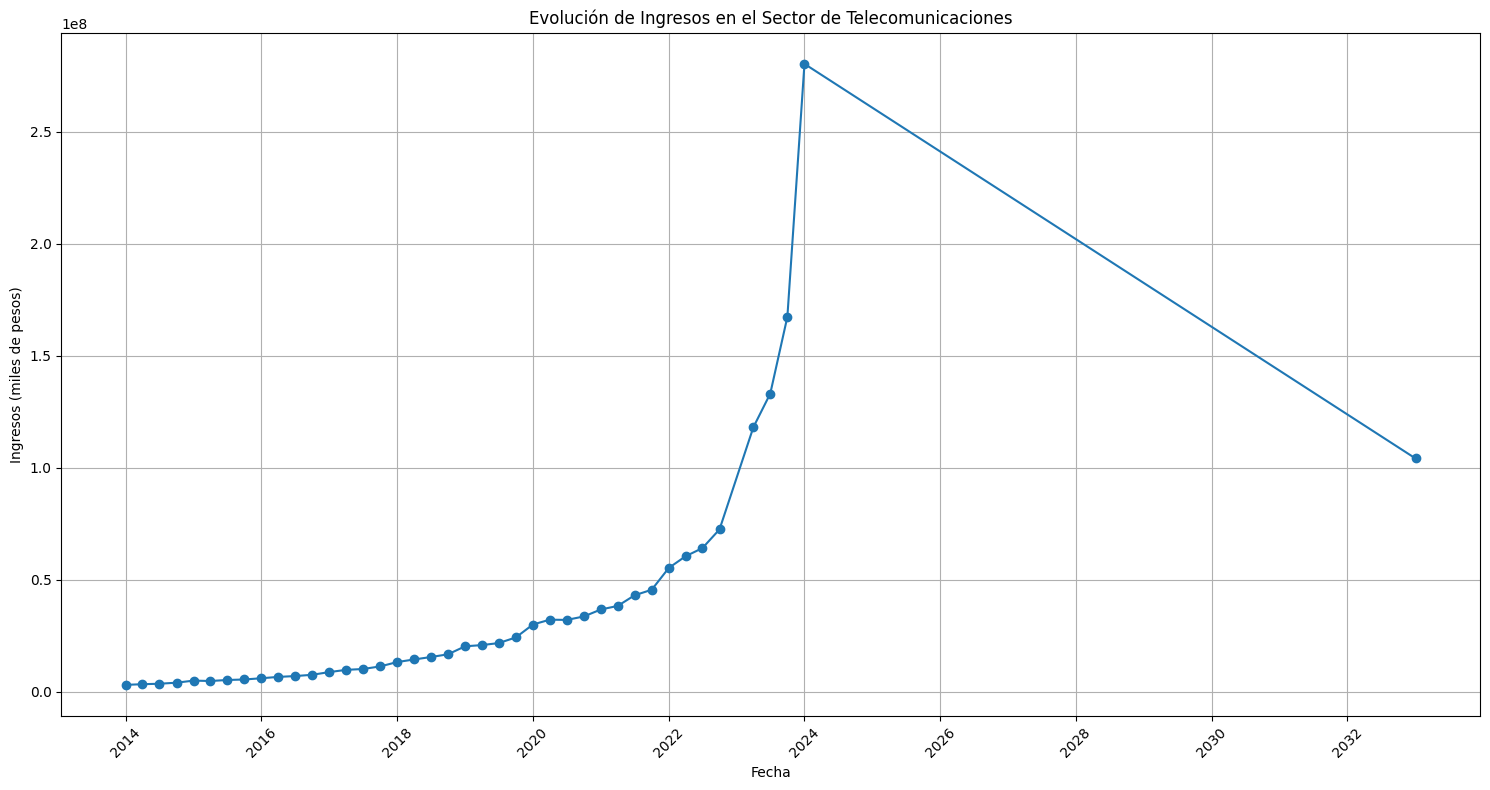

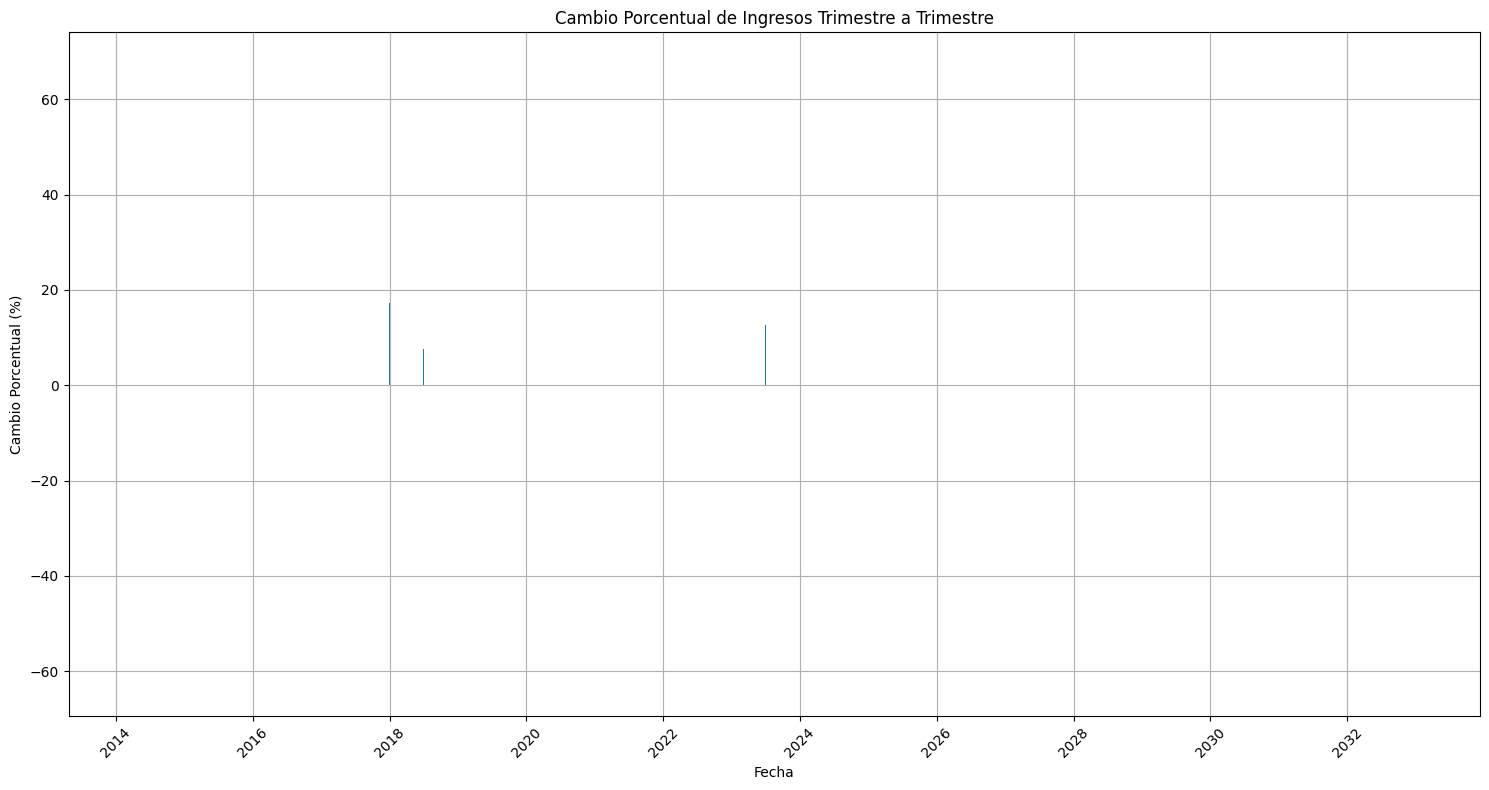

Ingreso promedio: 38,850,735.71 miles de pesos
Ingreso mínimo: 2,984,054.21 miles de pesos (Fecha: 2014-01-01 00:00:00)
Ingreso máximo: 280,419,124.08 miles de pesos (Fecha: 2024-01-01 00:00:00)
Tasa de crecimiento promedio trimestral: 11.15%
Tasa de crecimiento anual compuesto (CAGR): 20.56%


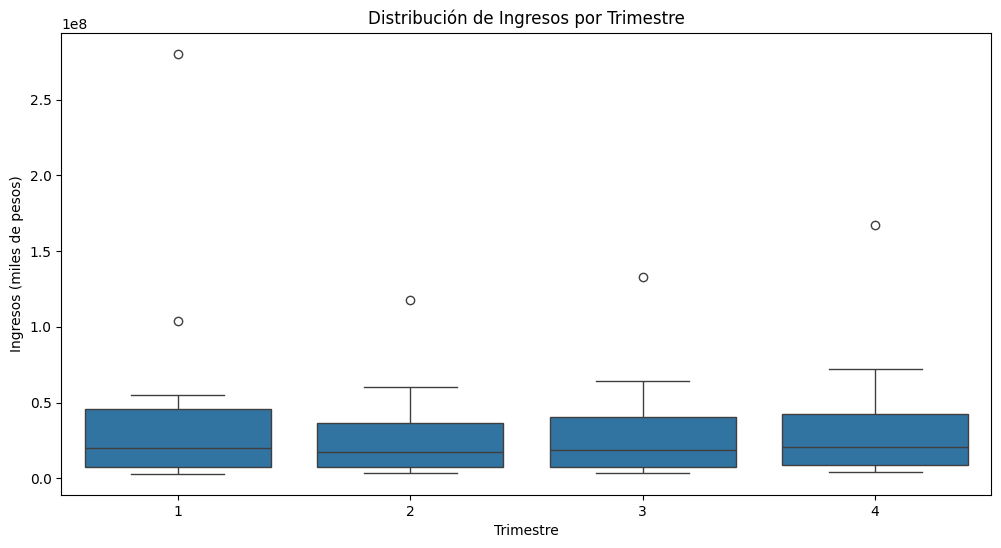

In [29]:
# Cargar los datos de ingresos
df_ingresos = dfs['Ingresos ']

# Convertir 'Año' y 'Trimestre' a datetime
df_ingresos['Fecha'] = pd.to_datetime(df_ingresos['Año'].astype(str) + 'Q' + df_ingresos['Trimestre'].astype(str))

# Ordenar por fecha
df_ingresos = df_ingresos.sort_values('Fecha')

# Calcular el cambio porcentual trimestre a trimestre
df_ingresos['Cambio Porcentual'] = df_ingresos['Ingresos (miles de pesos)'].pct_change() * 100

# Gráfico de evolución de ingresos
plt.figure(figsize=(15, 8))
plt.plot(df_ingresos['Fecha'], df_ingresos['Ingresos (miles de pesos)'], marker='o')
plt.title('Evolución de Ingresos en el Sector de Telecomunicaciones')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de cambio porcentual
plt.figure(figsize=(15, 8))
plt.bar(df_ingresos['Fecha'], df_ingresos['Cambio Porcentual'])
plt.title('Cambio Porcentual de Ingresos Trimestre a Trimestre')
plt.xlabel('Fecha')
plt.ylabel('Cambio Porcentual (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis estadístico
print(f"Ingreso promedio: {df_ingresos['Ingresos (miles de pesos)'].mean():,.2f} miles de pesos")
print(f"Ingreso mínimo: {df_ingresos['Ingresos (miles de pesos)'].min():,.2f} miles de pesos (Fecha: {df_ingresos.loc[df_ingresos['Ingresos (miles de pesos)'].idxmin(), 'Fecha']})")
print(f"Ingreso máximo: {df_ingresos['Ingresos (miles de pesos)'].max():,.2f} miles de pesos (Fecha: {df_ingresos.loc[df_ingresos['Ingresos (miles de pesos)'].idxmax(), 'Fecha']})")
print(f"Tasa de crecimiento promedio trimestral: {df_ingresos['Cambio Porcentual'].mean():.2f}%")

# Calcular tasa de crecimiento anual compuesto (CAGR)
primer_ingreso = df_ingresos.iloc[0]['Ingresos (miles de pesos)']
ultimo_ingreso = df_ingresos.iloc[-1]['Ingresos (miles de pesos)']
num_years = (df_ingresos.iloc[-1]['Fecha'] - df_ingresos.iloc[0]['Fecha']).days / 365.25
cagr = (ultimo_ingreso / primer_ingreso) ** (1/num_years) - 1
print(f"Tasa de crecimiento anual compuesto (CAGR): {cagr*100:.2f}%")

# Gráfico de ingresos por trimestre (estacionalidad)
df_ingresos['Trimestre'] = df_ingresos['Fecha'].dt.quarter
plt.figure(figsize=(12, 6))
sns.boxplot(x='Trimestre', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Distribución de Ingresos por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()

# Análisis Económico del Sector de Telecomunicaciones en Argentina (2014-2024)

## Tendencias Principales

1. **Crecimiento Agresivo de Ingresos**
   - Aumento constante desde 2014, con aceleración exponencial desde 2020.
   - Pico significativo en 2023, hasta incluso en 2024.

2. **Impacto de la Inflación**
   - Alta inflación en Argentina desde 2014, alcanzando más del 200% anual en diciembre 2023.
   - El aumento de ingresos se ve distorsionado no solo por un aumento proporcional en servicios o conexiones, sino por el aumento del valor de los servicios.

3. **Indicadores Clave**
   - Ingreso promedio: 38,850,735.71 miles de pesos
   - Ingreso mínimo: 2,984,054.21 miles de pesos (2014-01-01)
   - Ingreso máximo: 280,419,124.08 miles de pesos (2024-01-01)
   - Tasa de crecimiento promedio trimestral: 11.15%
   - CAGR (Tasa de Crecimiento Anual Compuesto): 20.56%

4. **Distribución Trimestral**
   - Distribución similar de ingresos entre trimestres.
   - Presencia de outliers en los últimos trimestres, posiblemente debido a la alta inflación (impactando en precios) y la crecidaexponencial de aumento de conexiones.

## Análisis Detallado

### Crecimiento vs. Inflación
- El crecimiento exponencial de ingresos debe interpretarse en el contexto de la alta inflación argentina.
- El aumento nominal de ingresos no necesariamente indica un crecimiento real del sector.

### CAGR y Sesgo Potencial
- El CAGR del 20.56% podría estar sesgado por los primeros años de bajo crecimiento.
- Este indicador puede no reflejar adecuadamente la aceleración reciente del crecimiento.

### Análisis Trimestral
- La distribución similar entre trimestres sugiere una cierta estabilidad estacional en los ingresos.
- Los outliers en los últimos trimestres de 2023, y el más importante del primer trimiestre de 2024 reflejan el impacto de la alta inflación y el crecimiento acelerado reciente.

## Implicaciones y Consideraciones

1. **Interpretación Cautelosa**: Es crucial interpretar el crecimiento de ingresos en términos reales, ajustando por inflación.

2. **Resiliencia del Sector**: A pesar de la inestabilidad económica, el sector muestra un crecimiento sostenido, indicando su importancia y resistencia.

3. **Desafíos de Proyección**: La volatilidad económica hace difícil proyectar tendencias futuras basadas únicamente en datos históricos.

4. **Necesidad de Análisis Complementarios**: Evaluar métricas adicionales como el número de suscriptores o el ingreso promedio por usuario para una visión más completa.

5. **Impacto en Inversiones**: El crecimiento sostenido, incluso en términos nominales, puede atraer inversiones al sector, potencialmente mejorando la infraestructura y servicios.

## Conclusión

El sector de telecomunicaciones en Argentina muestra un crecimiento nominal impresionante, pero este debe interpretarse cuidadosamente en el contexto de alta inflación del país. Mientras que el CAGR y las tasas de crecimiento indican un sector en expansión, es esencial considerar factores macroeconómicos para entender el crecimiento real. La estabilidad observada en la distribución trimestral, junto con la reciente aceleración, sugiere un sector resiliente con potencial de crecimiento continuo, aunque sujeto a los desafíos económicos del país.

# EDA 2° Parte:
## Relaciones y correlaciones:
### 1. Penetración vs. Tecnología

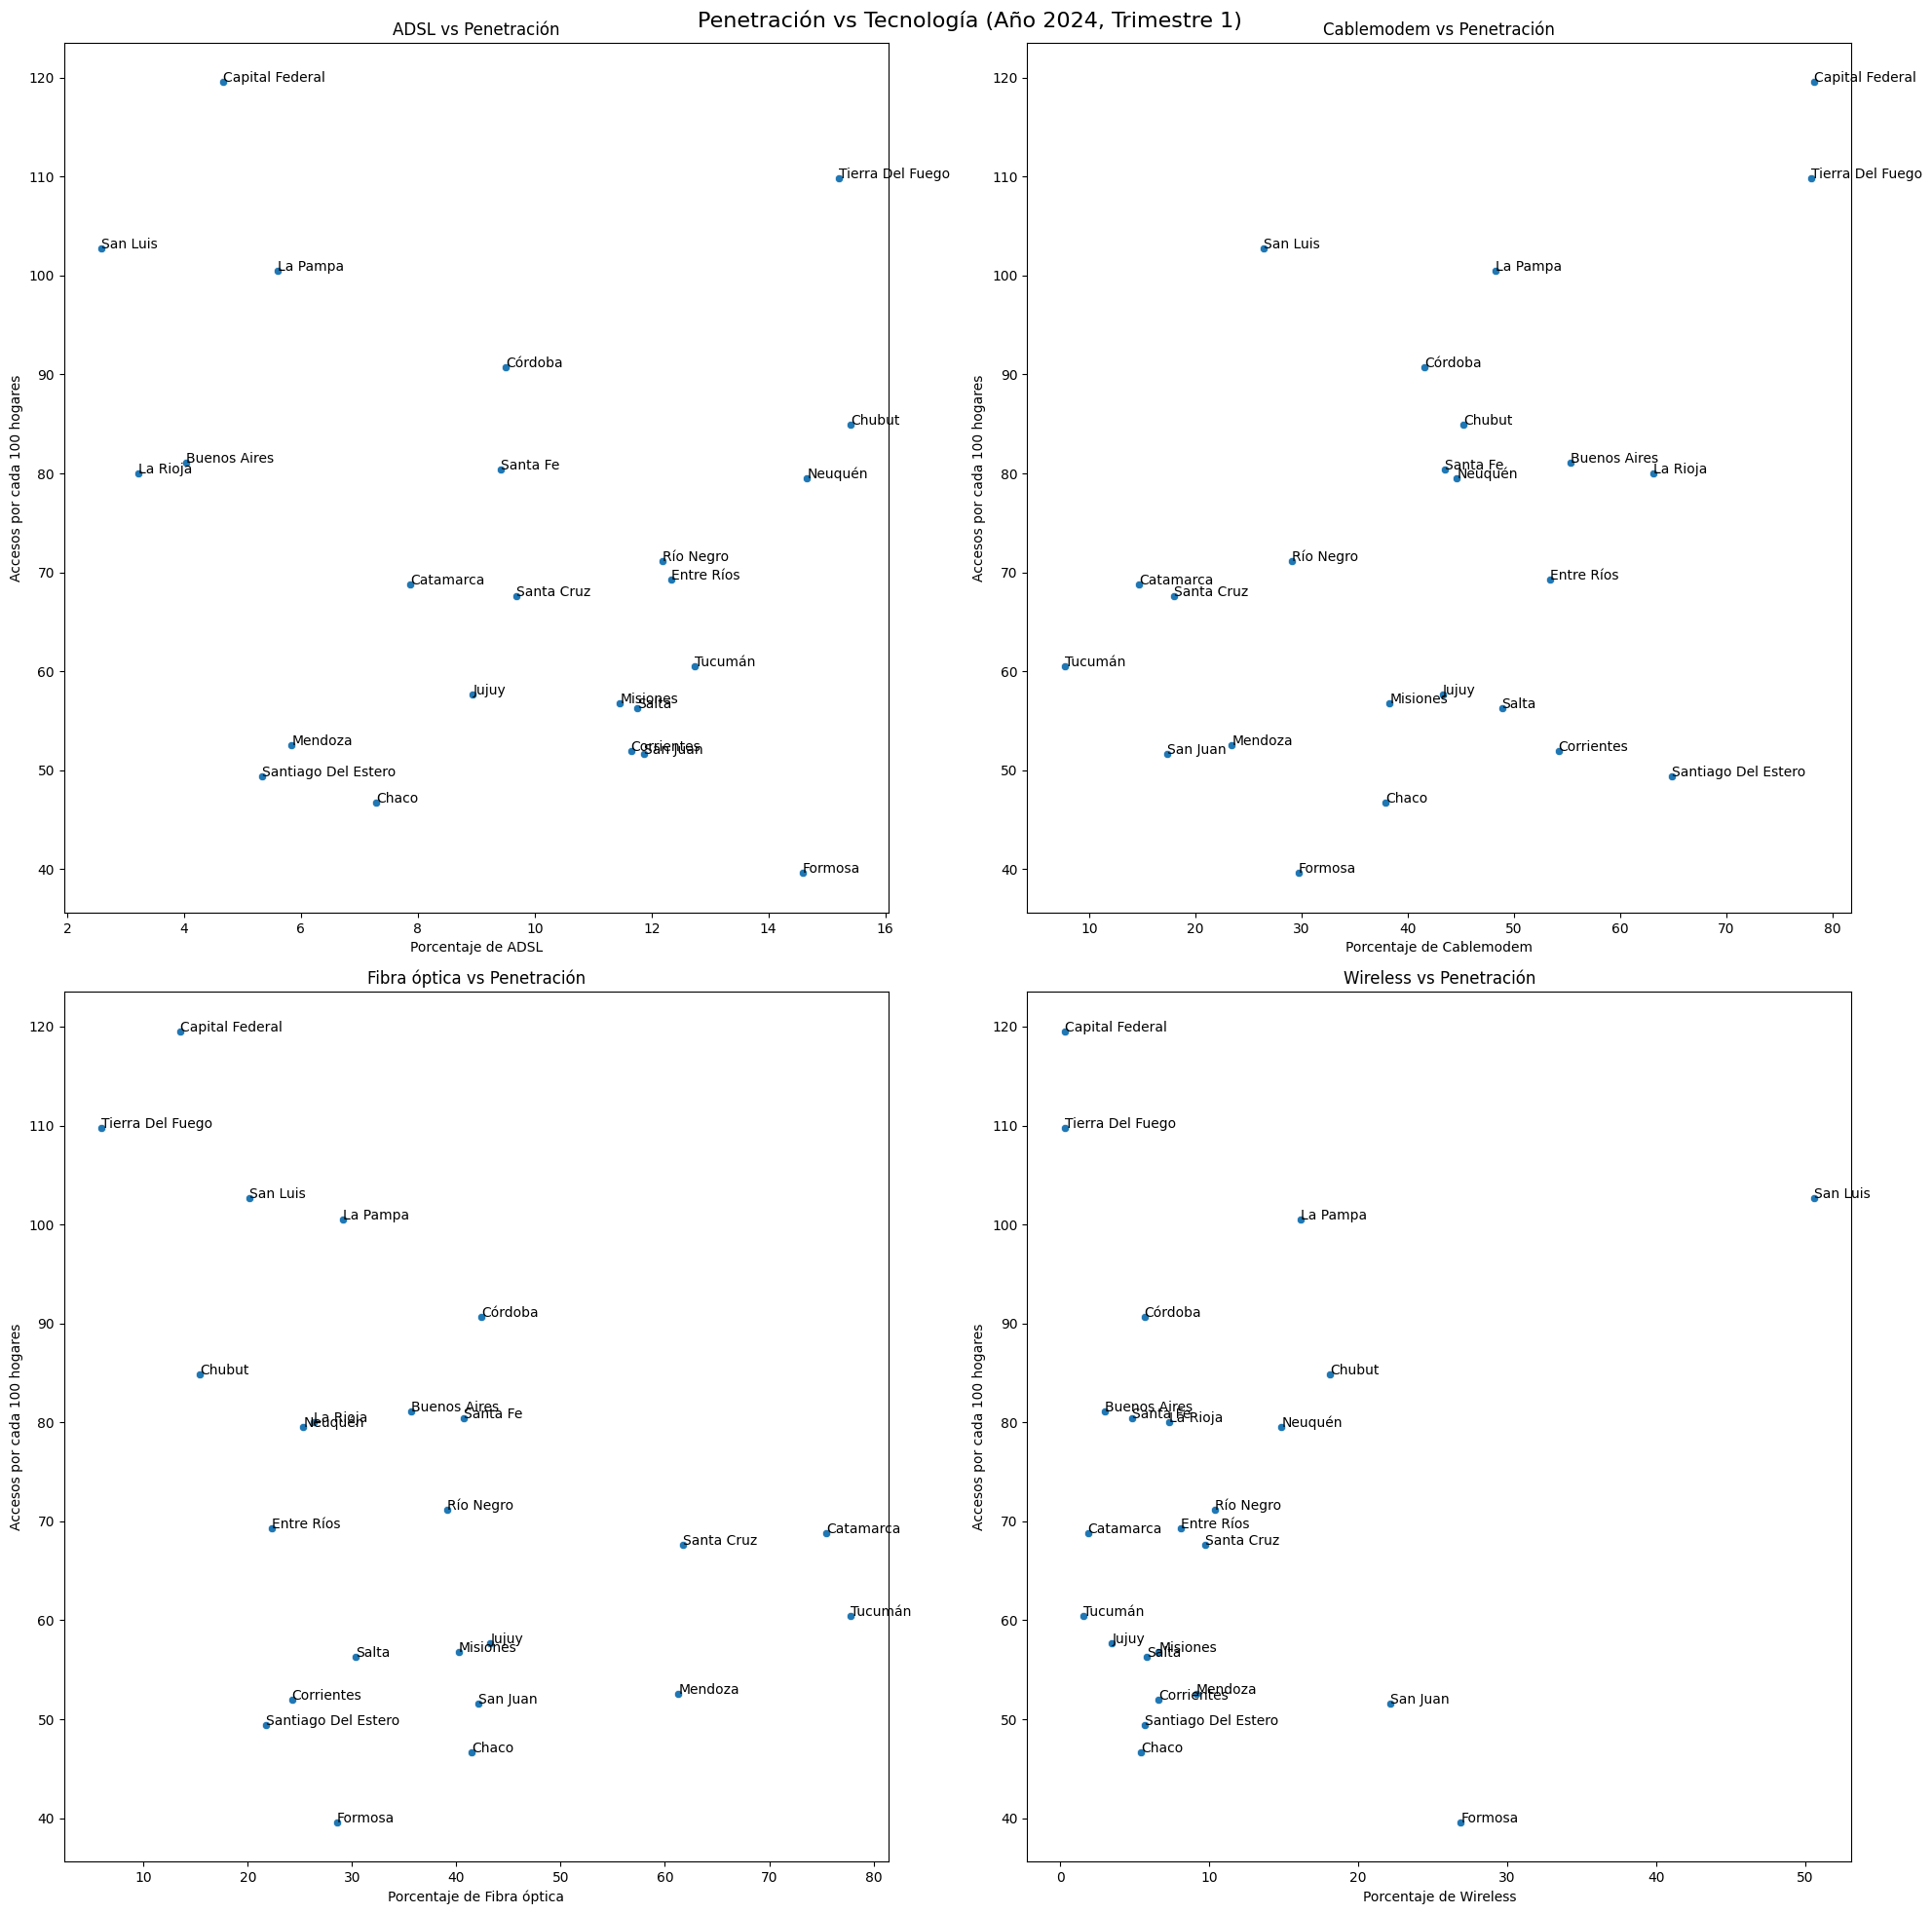

Correlaciones entre penetración y tecnologías:
Accesos por cada 100 hogares    1.000000
Cablemodem_porcentaje           0.458014
Wireless_porcentaje             0.068414
ADSL_porcentaje                -0.236858
Fibra óptica_porcentaje        -0.428784
Name: Accesos por cada 100 hogares, dtype: float64


In [30]:
# Obtener los últimos datos disponibles
ultimo_anio = dfs['Penetracion-hogares']['Año'].max()
ultimo_trimestre = dfs['Penetracion-hogares'][dfs['Penetracion-hogares']['Año'] == ultimo_anio]['Trimestre'].max()

# Filtrar los datos para el último período
penetracion = dfs['Penetracion-hogares'][(dfs['Penetracion-hogares']['Año'] == ultimo_anio) & 
                                         (dfs['Penetracion-hogares']['Trimestre'] == ultimo_trimestre)]

tecnologia = dfs['Accesos Por Tecnología'][(dfs['Accesos Por Tecnología']['Año'] == ultimo_anio) & 
                                           (dfs['Accesos Por Tecnología']['Trimestre'] == ultimo_trimestre)]

# Combinar los DataFrames
datos_combinados = pd.merge(penetracion, tecnologia, on='Provincia')

# Calcular el porcentaje de cada tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']
for tech in tecnologias:
    datos_combinados[f'{tech}_porcentaje'] = datos_combinados[tech] / datos_combinados['Total'] * 100

# Crear un gráfico de dispersión para cada tecnología
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle(f'Penetración vs Tecnología (Año {ultimo_anio}, Trimestre {ultimo_trimestre})', fontsize=16)

for i, tech in enumerate(tecnologias):
    ax = axes[i // 2, i % 2]
    sns.scatterplot(data=datos_combinados, x=f'{tech}_porcentaje', y='Accesos por cada 100 hogares', ax=ax)
    ax.set_title(f'{tech} vs Penetración')
    ax.set_xlabel(f'Porcentaje de {tech}')
    ax.set_ylabel('Accesos por cada 100 hogares')
    
    # Añadir etiquetas de provincias
    for _, row in datos_combinados.iterrows():
        ax.annotate(row['Provincia'], (row[f'{tech}_porcentaje'], row['Accesos por cada 100 hogares']))

plt.tight_layout()
plt.show()

# Calcular y mostrar correlaciones
correlaciones = datos_combinados[['Accesos por cada 100 hogares'] + [f'{tech}_porcentaje' for tech in tecnologias]].corr()['Accesos por cada 100 hogares'].sort_values(ascending=False)
print("Correlaciones entre penetración y tecnologías:")
print(correlaciones)

**Interpretación de los resultados:**

**Cablemodem_porcentaje (0.458014):**

Tiene la correlación positiva más fuerte con la penetración.
Esto sugiere que las provincias con un mayor porcentaje de conexiones por cable módem tienden a tener una mayor penetración de internet en los hogares.
La correlación es moderadamente fuerte, lo que indica una relación importante pero no determinante.


**Wireless_porcentaje (0.068414):**

Tiene una correlación positiva muy débil, casi nula.
Esto sugiere que no hay una relación clara entre el porcentaje de conexiones inalámbricas y la penetración de internet en los hogares.


**ADSL_porcentaje (-0.236858):**

Tiene una correlación negativa débil.
Esto sugiere que hay una ligera tendencia a que las provincias con un mayor porcentaje de conexiones ADSL tengan una menor penetración de internet en los hogares.
Sin embargo, la correlación es débil, por lo que no es una relación muy significativa.


**Fibra óptica_porcentaje (-0.428784):**

Tiene una correlación negativa moderada.
Sorprendentemente, esto sugiere que las provincias con un mayor porcentaje de conexiones de fibra óptica tienden a tener una menor penetración de internet en los hogares.
Este resultado es contraintuitivo y podría requerir un análisis más profundo.



**Interpretación general:**

El cable módem parece ser la tecnología más asociada con una alta penetración de internet en los hogares.
La tecnología inalámbrica no parece tener un impacto significativo en la penetración.
Tanto el ADSL como la fibra óptica muestran correlaciones negativas, lo cual es inesperado, especialmente para la fibra óptica.

**Posibles explicaciones y consideraciones:**

La correlación negativa de la fibra óptica podría deberse a que su despliegue es más reciente y aún no ha alcanzado una penetración significativa en muchas áreas.
El cable módem podría ser la tecnología más extendida y madura, lo que explicaría su fuerte correlación positiva.
Estos resultados podrían estar influenciados por factores como la geografía, la densidad poblacional o las políticas de despliegue de infraestructura en diferentes provincias.

**Recomendaciones:**

Investigar más a fondo la situación de la fibra óptica, especialmente en términos de su despliegue y adopción en diferentes provincias.
Considerar factores adicionales como la urbanización, la demografía y las políticas locales que puedan influir en estos patrones.
Analizar la evolución temporal de estas correlaciones para ver si han cambiado con el tiempo.

## 2. Velocidad vs. Penetración


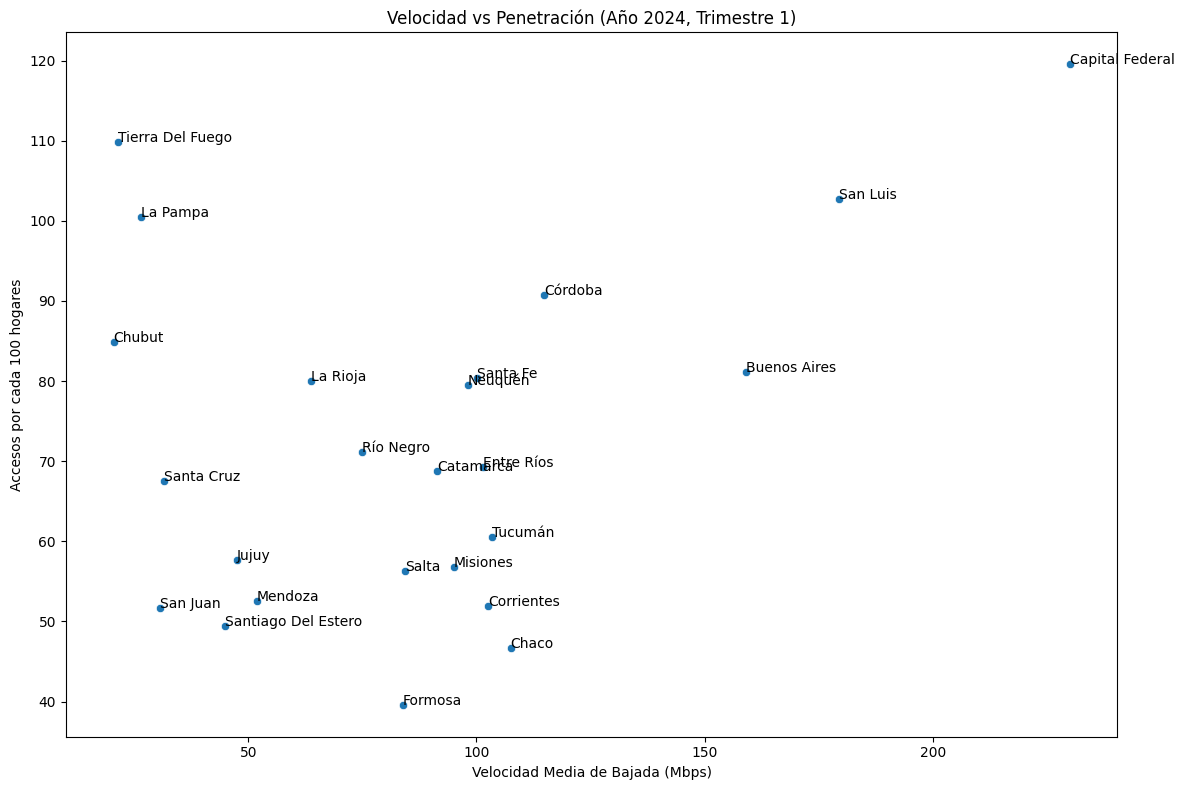

Correlación entre velocidad y penetración: 0.3311

Penetración promedio por rango de velocidad:
Rango_Velocidad
200+       119.530000
151-200     91.900000
0-50        74.488571
101-150     66.588333
51-100      63.093750
Name: Accesos por cada 100 hogares, dtype: float64


C:\Users\54370\AppData\Local\Temp\ipykernel_10692\671296575.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  penetracion_por_rango = datos_combinados.groupby('Rango_Velocidad')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False)


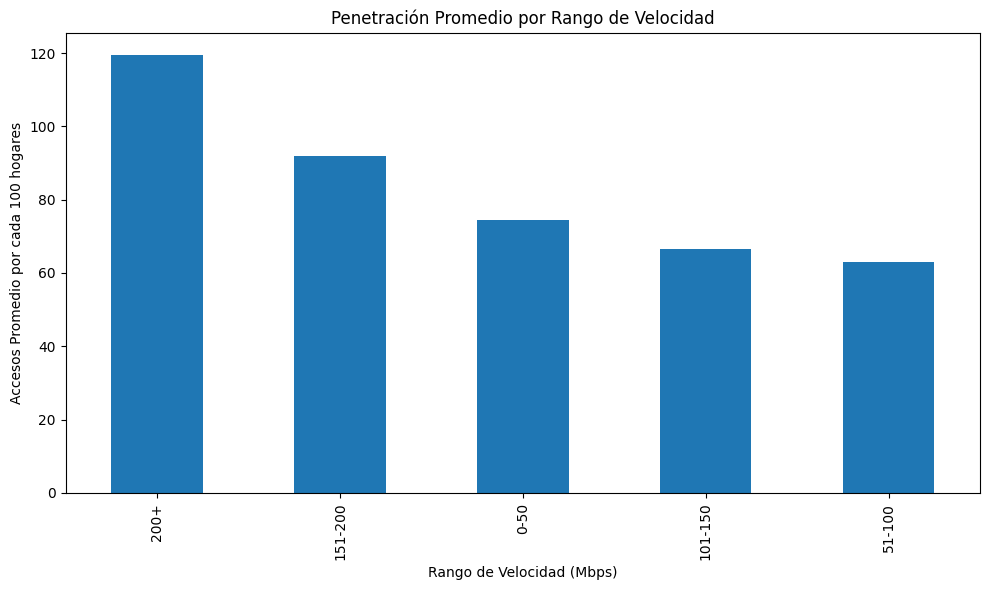

In [31]:
# Obtener el último año y trimestre disponible en ambos datasets
ultimo_anio = min(dfs['Velocidad % por prov']['Año'].max(), dfs['Penetracion-hogares']['Año'].max())
ultimo_trimestre = min(
    dfs['Velocidad % por prov'][dfs['Velocidad % por prov']['Año'] == ultimo_anio]['Trimestre'].max(),
    dfs['Penetracion-hogares'][dfs['Penetracion-hogares']['Año'] == ultimo_anio]['Trimestre'].max()
)

# Filtrar los datos para el último período
velocidad = dfs['Velocidad % por prov'][(dfs['Velocidad % por prov']['Año'] == ultimo_anio) & 
                                        (dfs['Velocidad % por prov']['Trimestre'] == ultimo_trimestre)]

penetracion = dfs['Penetracion-hogares'][(dfs['Penetracion-hogares']['Año'] == ultimo_anio) & 
                                         (dfs['Penetracion-hogares']['Trimestre'] == ultimo_trimestre)]

# Combinar los DataFrames
datos_combinados = pd.merge(velocidad, penetracion, on='Provincia')

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos_combinados, x='Mbps (Media de bajada)', y='Accesos por cada 100 hogares')

# Añadir etiquetas de provincias
for _, row in datos_combinados.iterrows():
    plt.annotate(row['Provincia'], (row['Mbps (Media de bajada)'], row['Accesos por cada 100 hogares']))

plt.title(f'Velocidad vs Penetración (Año {ultimo_anio}, Trimestre {ultimo_trimestre})')
plt.xlabel('Velocidad Media de Bajada (Mbps)')
plt.ylabel('Accesos por cada 100 hogares')
plt.tight_layout()
plt.show()

# Calcular y mostrar la correlación
correlacion = datos_combinados['Mbps (Media de bajada)'].corr(datos_combinados['Accesos por cada 100 hogares'])
print(f"Correlación entre velocidad y penetración: {correlacion:.4f}")

# Análisis adicional: Agrupar por rangos de velocidad
datos_combinados['Rango_Velocidad'] = pd.cut(datos_combinados['Mbps (Media de bajada)'], 
                                             bins=[0, 50, 100, 150, 200, float('inf')],
                                             labels=['0-50', '51-100', '101-150', '151-200', '200+'])

penetracion_por_rango = datos_combinados.groupby('Rango_Velocidad')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False)
print("\nPenetración promedio por rango de velocidad:")
print(penetracion_por_rango)

# Gráfico de barras para penetración por rango de velocidad
plt.figure(figsize=(10, 6))
penetracion_por_rango.plot(kind='bar')
plt.title('Penetración Promedio por Rango de Velocidad')
plt.xlabel('Rango de Velocidad (Mbps)')
plt.ylabel('Accesos Promedio por cada 100 hogares')
plt.tight_layout()
plt.show()


**Correlación entre velocidad y penetración: 0.3311**

Esta correlación positiva moderada sugiere que hay una relación entre la velocidad de internet y la penetración, pero no es una relación fuerte o determinante. Significa que, en general, a medida que aumenta la velocidad, tiende a aumentar la penetración, pero otros factores también influyen significativamente.

**Penetración promedio por rango de velocidad:**

  | Rango_Velocidad | Accesos por cada 100 hogares |
  |-----------------|------------------------------|
  | 200+            | 119.530000                   |
  | 151-200         | 91.900000                    |
  | 0-50            | 74.488571                    |
  | 101-150         | 66.588333                    |
  | 51-100          | 63.093750                    |



Interpretación:  
a) La penetración más alta se observa en el rango de velocidad más alto (200+ Mbps), con un promedio de 119.53 accesos por cada 100 hogares. Esto sugiere que las áreas con las velocidades más altas tienen una adopción de internet muy alta, incluso superando el 100% (lo que podría indicar múltiples conexiones por hogar).  
b) Hay una clara tendencia ascendente en la penetración a medida que aumenta la velocidad, con una excepción notable:  

El rango 151-200 Mbps tiene la segunda penetración más alta.
Sorprendentemente, el rango 0-50 Mbps tiene una penetración más alta que los rangos 51-100 y 101-150 Mbps.  

c) La diferencia en penetración entre los rangos más bajos (51-100 y 101-150 Mbps) es relativamente pequeña, lo que sugiere que otros factores además de la velocidad están influyendo en la adopción en estas categorías.    
**Conclusiones y consideraciones:**  

- Velocidades muy altas (200+ Mbps) están asociadas con una adopción significativamente mayor, lo que podría indicar que estas áreas tienen características particulares (como ser zonas urbanas o económicamente desarrolladas) que favorecen tanto la alta velocidad como la alta adopción.
- La relación entre velocidad y penetración no es completamente lineal, como se evidencia en el rango 0-50 Mbps. Esto podría deberse a:

  * Áreas rurales o menos desarrolladas donde las opciones de internet son limitadas, pero la necesidad es alta.
  * Posibles políticas de inclusión digital enfocadas en áreas de baja velocidad.


El salto significativo en la penetración para velocidades superiores a 150 Mbps sugiere que podría haber un "punto de inflexión" donde la alta velocidad se convierte en un factor más determinante para la adopción.
La moderada correlación (0.3311) indica que, si bien la velocidad es un factor importante, no es el único determinante en la adopción de internet. Otros factores como el costo, la disponibilidad, las políticas locales y las características demográficas también juegan un papel significativo.

**Recomendaciones para análisis adicional:**

- Investigar las características específicas de las áreas con velocidades superiores a 200 Mbps.
- Examinar las razones detrás de la alta penetración en el rango 0-50 Mbps.
Considerar factores socioeconómicos y geográficos que puedan influir en la relación entre velocidad y penetración.

## 3. Evolución Temporal


C:\Users\54370\AppData\Local\Temp\ipykernel_10692\1356916833.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_penetracion['Fecha'] = pd.to_datetime(df_penetracion['Año'].astype(str) + 'Q' + df_penetracion['Trimestre'].astype(str))
C:\Users\54370\AppData\Local\Temp\ipykernel_10692\1356916833.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_velocidad['Fecha'] = pd.to_datetime(df_velocidad['Año'].astype(str) + 'Q' + df_velocidad['Trimestre'].astype(str))


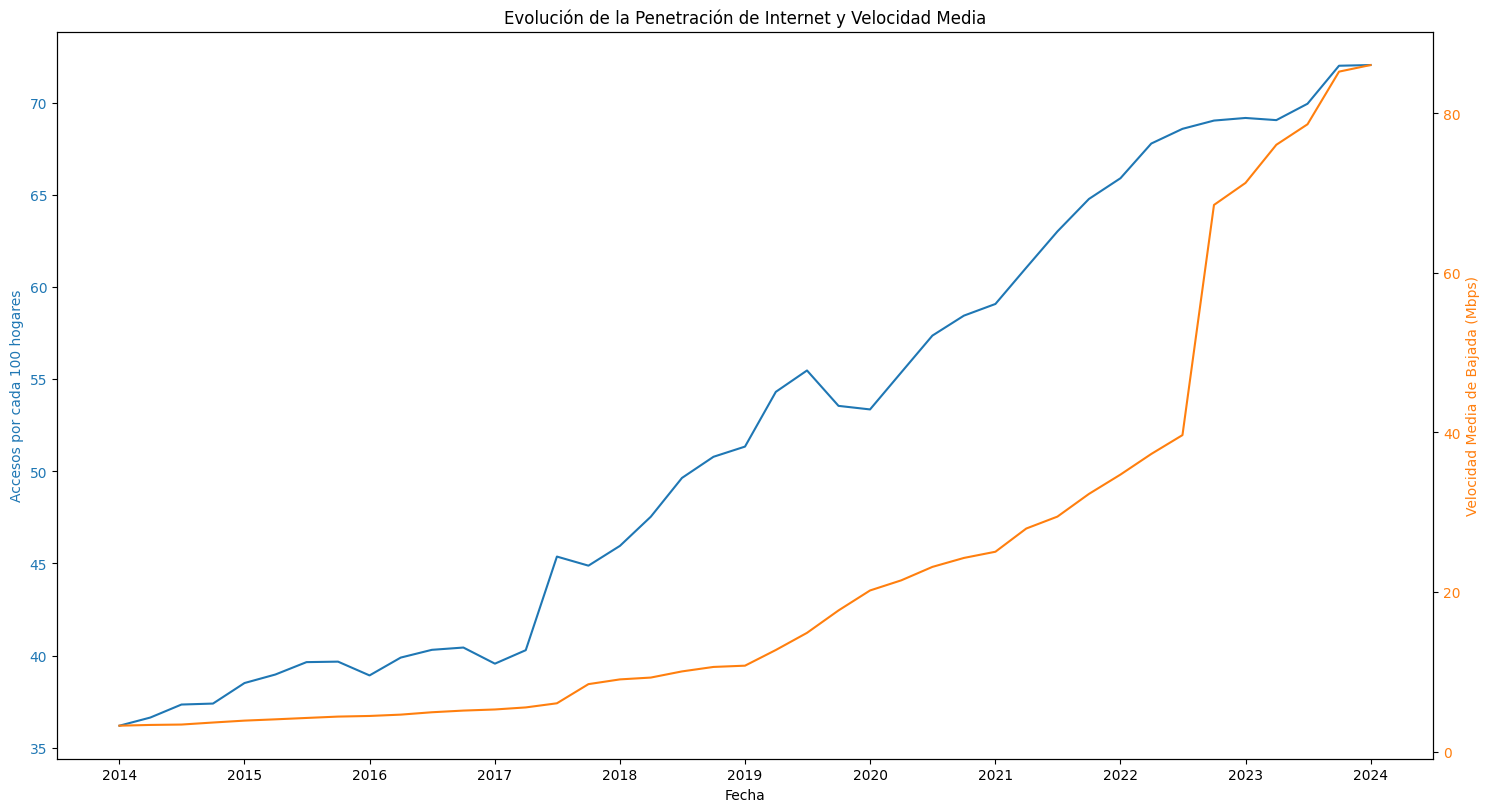

Tasa de crecimiento de penetración: 99.04%
Tasa de crecimiento de velocidad: 2554.36%


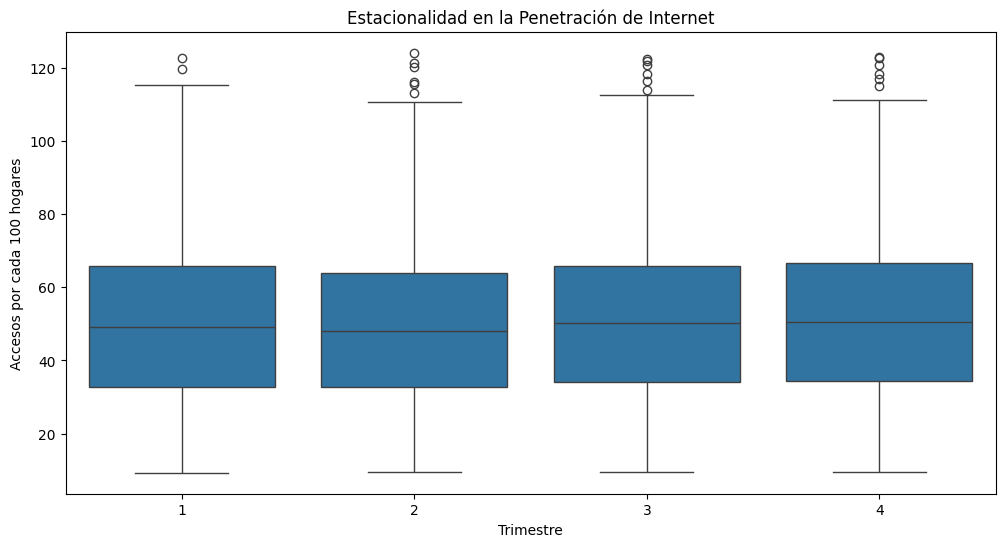

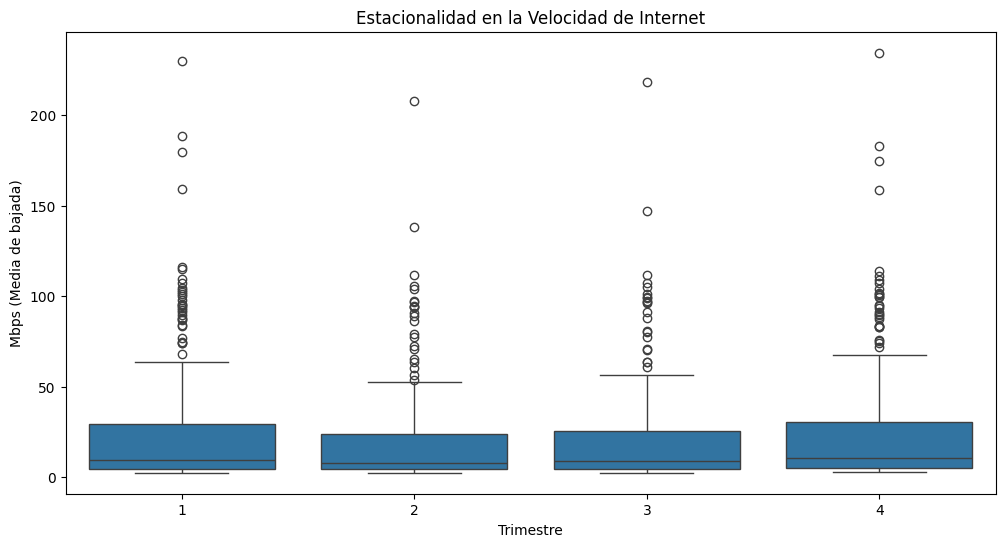

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos de penetración en hogares
df_penetracion = dfs['Penetracion-hogares']
df_penetracion['Fecha'] = pd.to_datetime(df_penetracion['Año'].astype(str) + 'Q' + df_penetracion['Trimestre'].astype(str))
df_penetracion_promedio = df_penetracion.groupby('Fecha')['Accesos por cada 100 hogares'].mean().reset_index()

# Preparar datos de velocidad
df_velocidad = dfs['Velocidad % por prov']
df_velocidad['Fecha'] = pd.to_datetime(df_velocidad['Año'].astype(str) + 'Q' + df_velocidad['Trimestre'].astype(str))
df_velocidad_promedio = df_velocidad.groupby('Fecha')['Mbps (Media de bajada)'].mean().reset_index()

# Crear gráfico de evolución temporal
fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Accesos por cada 100 hogares', color=color)
ax1.plot(df_penetracion_promedio['Fecha'], df_penetracion_promedio['Accesos por cada 100 hogares'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('Velocidad Media de Bajada (Mbps)', color=color)
ax2.plot(df_velocidad_promedio['Fecha'], df_velocidad_promedio['Mbps (Media de bajada)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Evolución de la Penetración de Internet y Velocidad Media')
plt.show()

# Calcular tasas de crecimiento
tasa_crecimiento_penetracion = (df_penetracion_promedio['Accesos por cada 100 hogares'].iloc[-1] / 
                                df_penetracion_promedio['Accesos por cada 100 hogares'].iloc[0] - 1) * 100

tasa_crecimiento_velocidad = (df_velocidad_promedio['Mbps (Media de bajada)'].iloc[-1] / 
                              df_velocidad_promedio['Mbps (Media de bajada)'].iloc[0] - 1) * 100

print(f"Tasa de crecimiento de penetración: {tasa_crecimiento_penetracion:.2f}%")
print(f"Tasa de crecimiento de velocidad: {tasa_crecimiento_velocidad:.2f}%")

# Análisis de estacionalidad
df_penetracion['Trimestre'] = df_penetracion['Fecha'].dt.quarter
df_velocidad['Trimestre'] = df_velocidad['Fecha'].dt.quarter

plt.figure(figsize=(12, 6))
sns.boxplot(x='Trimestre', y='Accesos por cada 100 hogares', data=df_penetracion)
plt.title('Estacionalidad en la Penetración de Internet')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Trimestre', y='Mbps (Media de bajada)', data=df_velocidad)
plt.title('Estacionalidad en la Velocidad de Internet')
plt.show()

# Análisis de la Evolución de Internet en Argentina (2014-2024)

## Datos Clave
- Tasa de crecimiento de penetración: 99.04%
- Tasa de crecimiento de velocidad: 2554.36%

## 1. Tendencia General
- Claro crecimiento tanto en penetración como en velocidad de internet desde 2014 a 2024.

## 2. Penetración de Internet
- **Inicio (2014):** ~36 accesos por 100 hogares
- **Fin (2024):** ~72 accesos por 100 hogares
- Crecimiento constante, acelerándose desde 2017
- **Tasa de crecimiento:** 99.04% (casi duplicado)

## 3. Velocidad Media
- **Inicio (2014):** <5 Mbps (estimado)
- **Fin (2024):** >80 Mbps
- Crecimiento exponencial, especialmente desde 2017
- Aumento dramático desde 2022
- **Tasa de crecimiento:** 2554.36% (multiplicado por más de 25)

## 4. Comparación de Crecimiento
- Velocidad media creció mucho más rápido que la penetración
- Penetración: duplicada
- Velocidad: multiplicada por 25+

## 5. Puntos de Inflexión
- **2017:** Aceleración en ambas métricas
- **2022-2023:** Crecimiento muy acelerado en velocidad

## 6. Relación Penetración-Velocidad
- Ambas crecen, pero velocidad aumenta más rápidamente
- Sugiere mejora significativa en calidad del servicio

## 7. Implicaciones
- Mayor adopción de internet en hogares argentinos
- Mejoras importantes en infraestructura de internet
- Enfoque en mejorar calidad más que en expandir cobertura

## 8. Consideraciones Finales
- Aún hay margen para aumentar penetración (no alcanza 100%)
- Rápido aumento de velocidad posiblemente debido a nuevas tecnologías (fibra óptica, 5G)

## Conclusión
Desarrollo significativo en infraestructura de internet en Argentina, con énfasis en mejora de calidad del servicio en años recientes.

## 4. Análisis Geográfico


C:\Users\54370\AppData\Local\Temp\ipykernel_10692\3292565241.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accesos por cada 100 hogares', y='Provincia', data=df_combinado, palette='viridis')


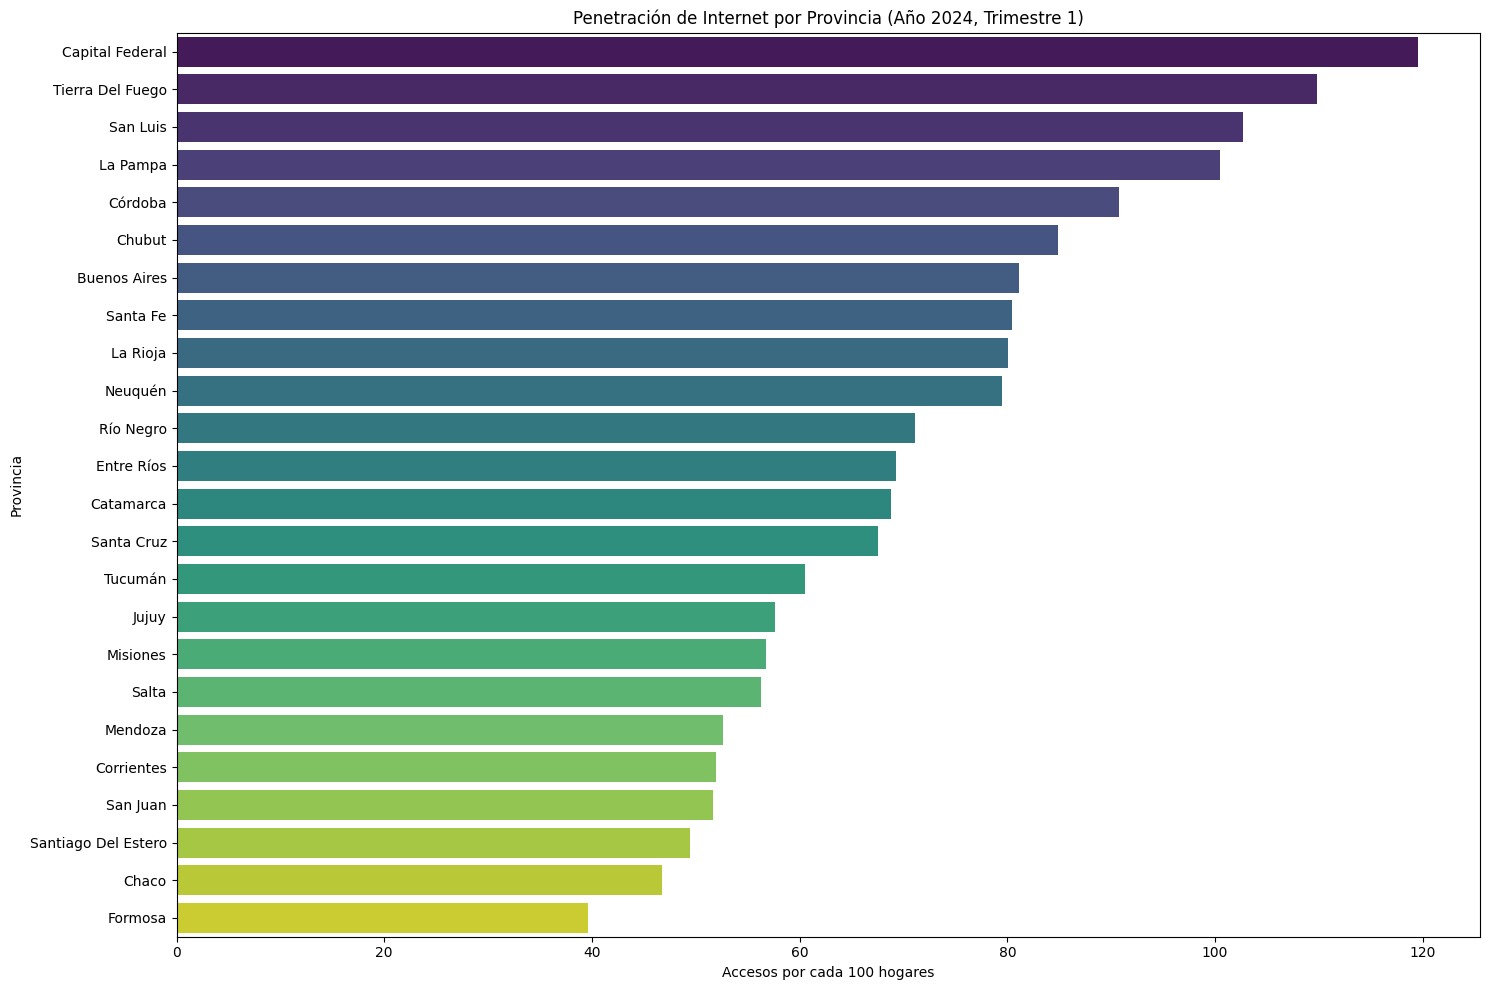

C:\Users\54370\AppData\Local\Temp\ipykernel_10692\3292565241.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mbps (Media de bajada)', y='Provincia', data=df_combinado, palette='viridis')


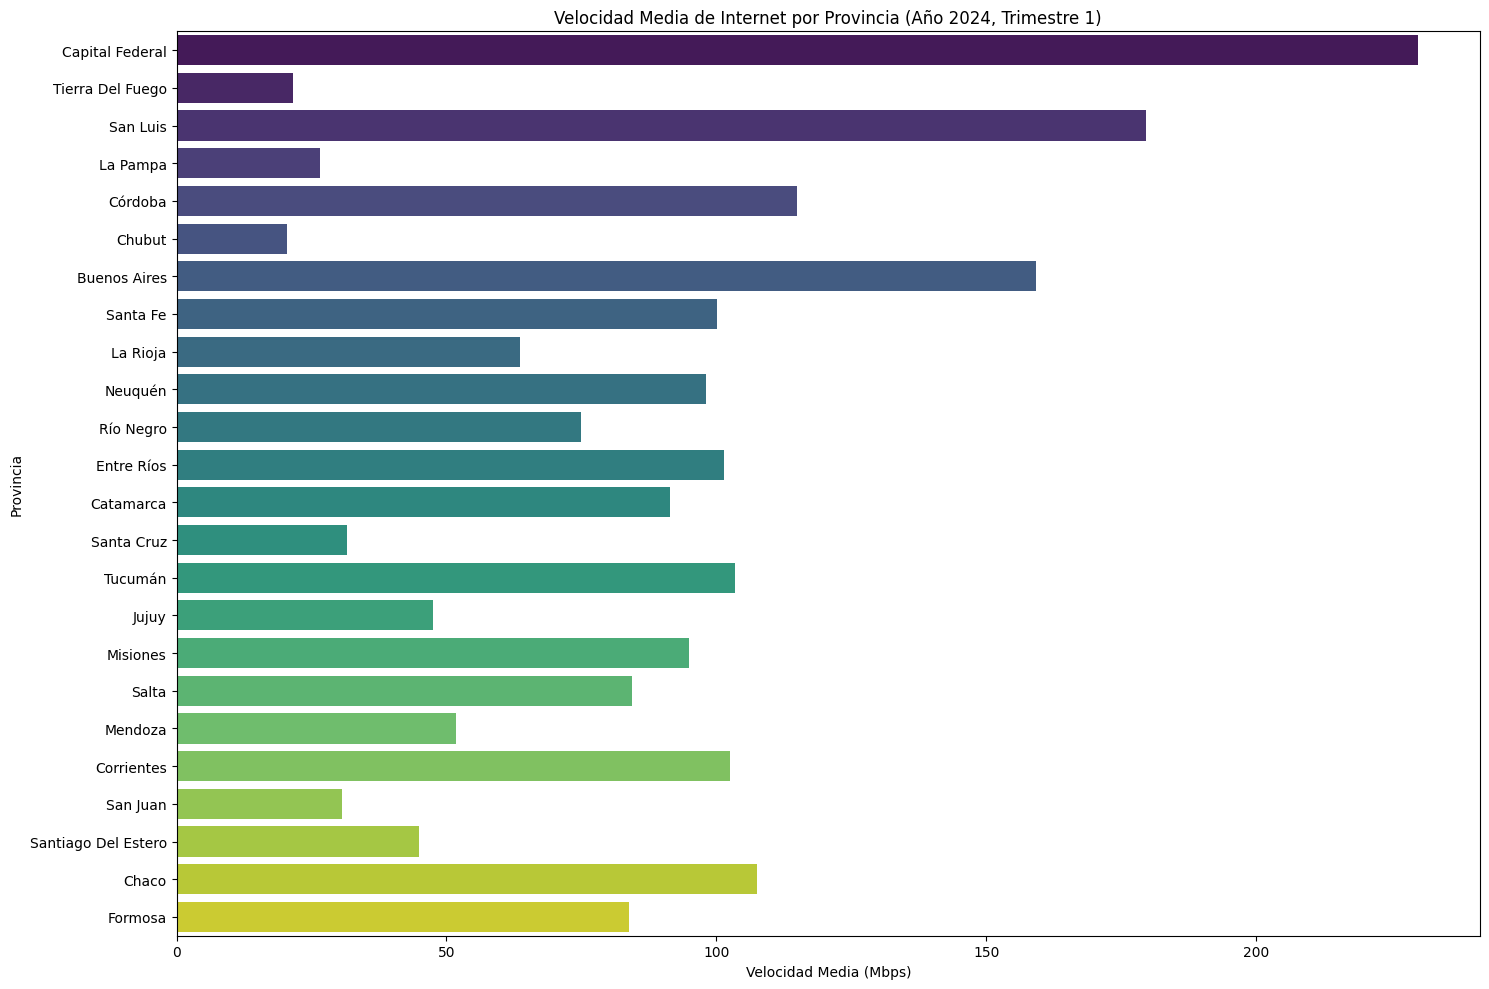

Provincia con mayor penetración: Capital Federal (119.53)
Provincia con menor penetración: Formosa (39.61)

Provincia con mayor velocidad: Capital Federal (229.94 Mbps)
Provincia con menor velocidad: Chubut (20.50 Mbps)

Brecha digital en penetración: 79.92 accesos por 100 hogares
Brecha digital en velocidad: 209.44 Mbps

Correlación entre penetración y velocidad: 0.33


In [33]:
# Obtener el último año y trimestre disponible
ultimo_anio = dfs['Penetracion-hogares']['Año'].max()
ultimo_trimestre = dfs['Penetracion-hogares'][dfs['Penetracion-hogares']['Año'] == ultimo_anio]['Trimestre'].max()

# Filtrar datos para el último período
df_penetracion = dfs['Penetracion-hogares'][(dfs['Penetracion-hogares']['Año'] == ultimo_anio) & 
                                            (dfs['Penetracion-hogares']['Trimestre'] == ultimo_trimestre)]

df_velocidad = dfs['Velocidad % por prov'][(dfs['Velocidad % por prov']['Año'] == ultimo_anio) & 
                                           (dfs['Velocidad % por prov']['Trimestre'] == ultimo_trimestre)]

# Combinar datos de penetración y velocidad
df_combinado = pd.merge(df_penetracion, df_velocidad[['Provincia', 'Mbps (Media de bajada)']], on='Provincia')

# Ordenar provincias por penetración
df_combinado = df_combinado.sort_values('Accesos por cada 100 hogares', ascending=False)

# Crear gráfico de barras para penetración
plt.figure(figsize=(15, 10))
sns.barplot(x='Accesos por cada 100 hogares', y='Provincia', data=df_combinado, palette='viridis')
plt.title(f'Penetración de Internet por Provincia (Año {ultimo_anio}, Trimestre {ultimo_trimestre})')
plt.xlabel('Accesos por cada 100 hogares')
plt.tight_layout()
plt.show()

# Crear gráfico de barras para velocidad
plt.figure(figsize=(15, 10))
sns.barplot(x='Mbps (Media de bajada)', y='Provincia', data=df_combinado, palette='viridis')
plt.title(f'Velocidad Media de Internet por Provincia (Año {ultimo_anio}, Trimestre {ultimo_trimestre})')
plt.xlabel('Velocidad Media (Mbps)')
plt.tight_layout()
plt.show()

# Calcular estadísticas
print(f"Provincia con mayor penetración: {df_combinado['Provincia'].iloc[0]} ({df_combinado['Accesos por cada 100 hogares'].iloc[0]:.2f})")
print(f"Provincia con menor penetración: {df_combinado['Provincia'].iloc[-1]} ({df_combinado['Accesos por cada 100 hogares'].iloc[-1]:.2f})")
print(f"\nProvincia con mayor velocidad: {df_combinado.loc[df_combinado['Mbps (Media de bajada)'].idxmax(), 'Provincia']} ({df_combinado['Mbps (Media de bajada)'].max():.2f} Mbps)")
print(f"Provincia con menor velocidad: {df_combinado.loc[df_combinado['Mbps (Media de bajada)'].idxmin(), 'Provincia']} ({df_combinado['Mbps (Media de bajada)'].min():.2f} Mbps)")

# Calcular la brecha digital
brecha_penetracion = df_combinado['Accesos por cada 100 hogares'].max() - df_combinado['Accesos por cada 100 hogares'].min()
brecha_velocidad = df_combinado['Mbps (Media de bajada)'].max() - df_combinado['Mbps (Media de bajada)'].min()

print(f"\nBrecha digital en penetración: {brecha_penetracion:.2f} accesos por 100 hogares")
print(f"Brecha digital en velocidad: {brecha_velocidad:.2f} Mbps")

# Calcular correlación entre penetración y velocidad
correlacion = df_combinado['Accesos por cada 100 hogares'].corr(df_combinado['Mbps (Media de bajada)'])
print(f"\nCorrelación entre penetración y velocidad: {correlacion:.2f}")

## 5. Ingresos vs. Penetración y Velocidad


Correlación entre Ingresos y Penetración: 0.75
Correlación entre Ingresos y Velocidad: 0.91


C:\Users\54370\AppData\Local\Temp\ipykernel_18212\2776357970.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ingresos['Fecha'] = pd.to_datetime(df_ingresos['Año'].astype(str) + 'Q' + df_ingresos['Trimestre'].astype(str))
C:\Users\54370\AppData\Local\Temp\ipykernel_18212\2776357970.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_penetracion['Fecha'] = pd.to_datetime(df_penetracion['Año'].astype(str) + 'Q' + df_penetracion['Trimestre'].astype(str))
C:\Users\54370\AppData\Local\Temp\ipykernel_18212\2776357970.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d

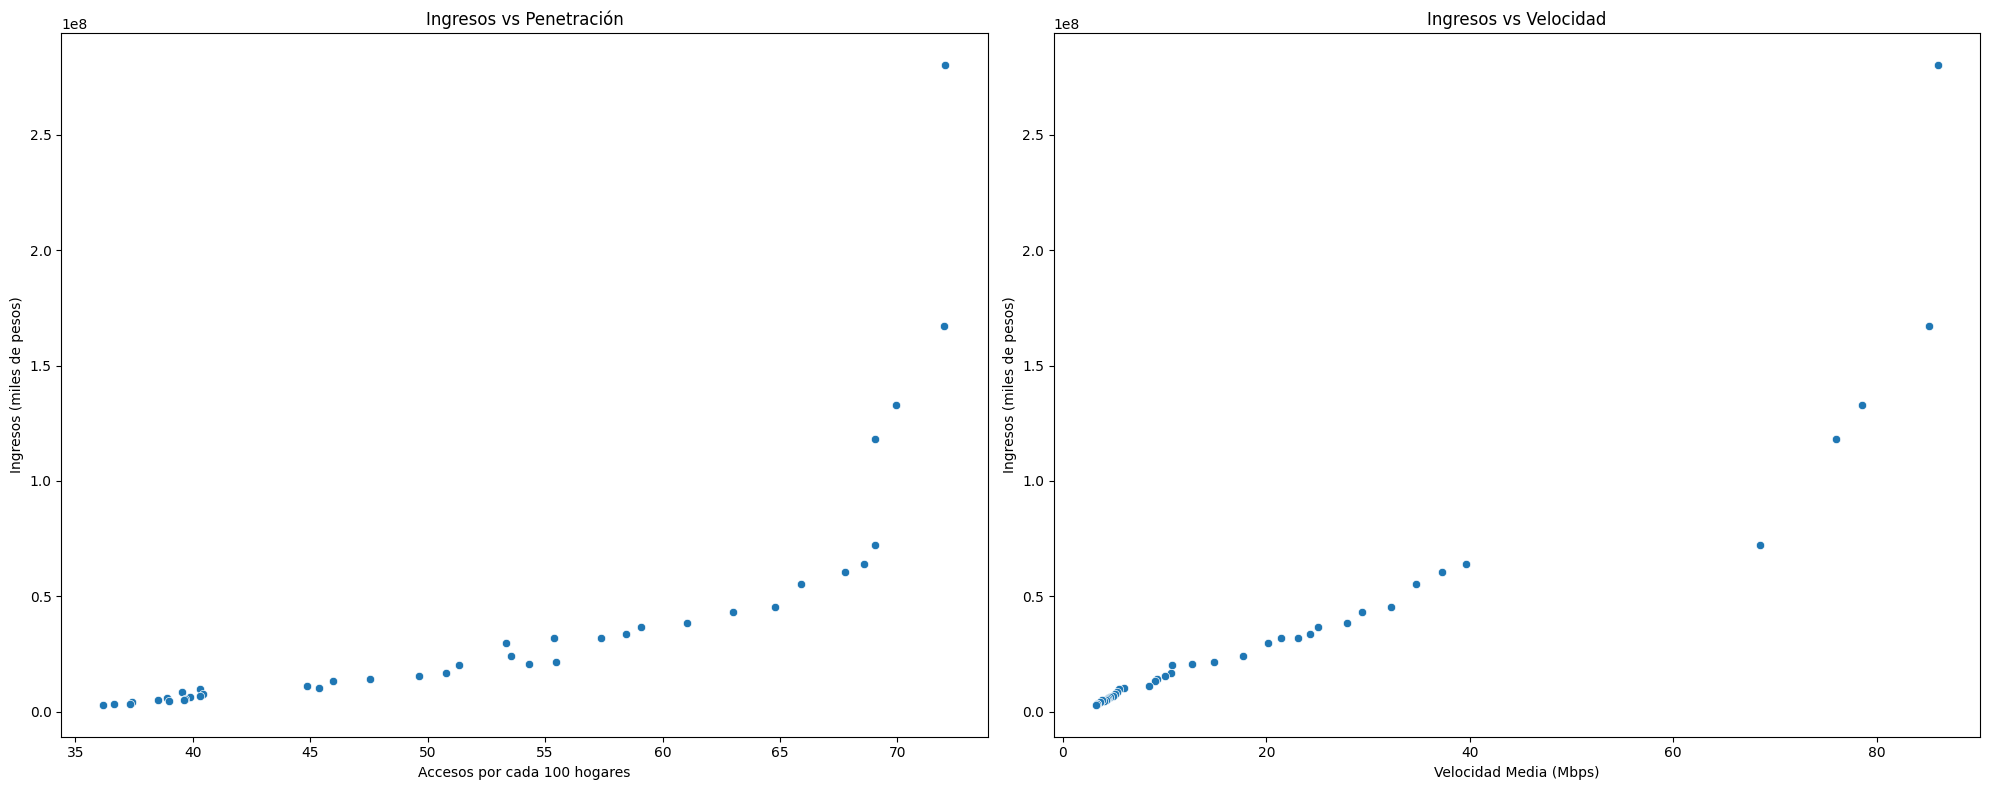


Regresión lineal - Ingresos vs Penetración:
Pendiente: 3383475.44
Intersección: -137822790.03
R-cuadrado: 0.56
Valor p: 0.0000

Regresión lineal - Ingresos vs Velocidad:
Pendiente: 2026715.42
Intersección: -7338809.26
R-cuadrado: 0.84
Valor p: 0.0000


In [ ]:
# Preparar datos de ingresos
df_ingresos = dfs['Ingresos ']
df_ingresos['Fecha'] = pd.to_datetime(df_ingresos['Año'].astype(str) + 'Q' + df_ingresos['Trimestre'].astype(str))

# Preparar datos de penetración
df_penetracion = dfs['Penetracion-hogares']
df_penetracion['Fecha'] = pd.to_datetime(df_penetracion['Año'].astype(str) + 'Q' + df_penetracion['Trimestre'].astype(str))
df_penetracion = df_penetracion.groupby('Fecha')['Accesos por cada 100 hogares'].mean().reset_index()

# Preparar datos de velocidad
df_velocidad = dfs['Velocidad % por prov']
df_velocidad['Fecha'] = pd.to_datetime(df_velocidad['Año'].astype(str) + 'Q' + df_velocidad['Trimestre'].astype(str))
df_velocidad = df_velocidad.groupby('Fecha')['Mbps (Media de bajada)'].mean().reset_index()

# Combinar todos los datos
df_combinado = pd.merge(df_ingresos, df_penetracion, on='Fecha')
df_combinado = pd.merge(df_combinado, df_velocidad, on='Fecha')

# Calcular correlaciones
corr_ingresos_penetracion = df_combinado['Ingresos (miles de pesos)'].corr(df_combinado['Accesos por cada 100 hogares'])
corr_ingresos_velocidad = df_combinado['Ingresos (miles de pesos)'].corr(df_combinado['Mbps (Media de bajada)'])

print(f"Correlación entre Ingresos y Penetración: {corr_ingresos_penetracion:.2f}")
print(f"Correlación entre Ingresos y Velocidad: {corr_ingresos_velocidad:.2f}")

# Gráficos de dispersión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=df_combinado, x='Accesos por cada 100 hogares', y='Ingresos (miles de pesos)', ax=ax1)
ax1.set_title('Ingresos vs Penetración')
ax1.set_xlabel('Accesos por cada 100 hogares')
ax1.set_ylabel('Ingresos (miles de pesos)')

sns.scatterplot(data=df_combinado, x='Mbps (Media de bajada)', y='Ingresos (miles de pesos)', ax=ax2)
ax2.set_title('Ingresos vs Velocidad')
ax2.set_xlabel('Velocidad Media (Mbps)')
ax2.set_ylabel('Ingresos (miles de pesos)')

plt.tight_layout()
plt.show()

# Análisis de regresión
slope_penetracion, intercept_penetracion, r_value_penetracion, p_value_penetracion, std_err_penetracion = stats.linregress(df_combinado['Accesos por cada 100 hogares'], df_combinado['Ingresos (miles de pesos)'])

slope_velocidad, intercept_velocidad, r_value_velocidad, p_value_velocidad, std_err_velocidad = stats.linregress(df_combinado['Mbps (Media de bajada)'], df_combinado['Ingresos (miles de pesos)'])

print("\nRegresión lineal - Ingresos vs Penetración:")
print(f"Pendiente: {slope_penetracion:.2f}")
print(f"Intersección: {intercept_penetracion:.2f}")
print(f"R-cuadrado: {r_value_penetracion**2:.2f}")
print(f"Valor p: {p_value_penetracion:.4f}")

print("\nRegresión lineal - Ingresos vs Velocidad:")
print(f"Pendiente: {slope_velocidad:.2f}")
print(f"Intersección: {intercept_velocidad:.2f}")
print(f"R-cuadrado: {r_value_velocidad**2:.2f}")
print(f"Valor p: {p_value_velocidad:.4f}")

# Análisis de Ingresos vs Penetración y Velocidad en el Sector de Telecomunicaciones

## Resumen de Resultados

### Ingresos vs Penetración
- **Correlación**: Positiva
- **R-cuadrado**: 0.56
- **Pendiente**: 3,383,475.44
- **Intersección**: -137,822,790.03
- **Valor p**: < 0.0001 (estadísticamente significativo)

### Ingresos vs Velocidad
- **Correlación**: Positiva, más fuerte que con penetración
- **R-cuadrado**: 0.84
- **Pendiente**: 2,026,715.42
- **Intersección**: -7,338,809.26
- **Valor p**: < 0.0001 (estadísticamente significativo)

## Interpretación

1. **Relación General**
   - Ambas variables muestran correlación positiva con ingresos
   - Velocidad presenta una relación más fuerte y clara

2. **Penetración vs Ingresos**
   - Tendencia positiva: mayor penetración, mayores ingresos
   - 56% de variabilidad en ingresos explicada por penetración
   - Otros factores también influyen significativamente

3. **Velocidad vs Ingresos**
   - Relación positiva más fuerte
   - 84% de variabilidad en ingresos explicada por velocidad
   - Ajuste más cercano a una línea recta

4. **Comparativa**
   - Velocidad es mejor predictor de ingresos que penetración
   - Aumentar velocidad podría ser más efectivo para incrementar ingresos

5. **Observaciones Adicionales**
   - Puntos atípicos en valores altos sugieren crecimiento reciente o factores externos
   - Relación no perfectamente lineal en ambos casos

## Implicaciones y Consideraciones

1. **Estrategias de Negocio**
   - Priorizar mejoras en velocidad del servicio
   - Combinar aumento de penetración con mejoras de velocidad

2. **Limitaciones del Análisis**
   - Correlación no implica causalidad
   - Posibles factores no considerados: competencia, regulación, cambios tecnológicos

3. **Recomendaciones**
   - Investigar factores adicionales para una visión más completa
   - Considerar efectos combinados de penetración y velocidad

## Conclusión Final

La velocidad de internet muestra una relación más fuerte con los ingresos que la penetración. Mientras que aumentar la cobertura (penetración) es importante, mejorar la calidad del servicio (velocidad) podría ser una estrategia más efectiva para el crecimiento de ingresos en el sector de telecomunicaciones.

Resumen del Contexto:
Este análisis se centra en el sector de telecomunicaciones en Argentina, específicamente en el servicio de internet. Se utilizaron datos de un archivo Excel llamado "Internet.xlsx", que contiene varias hojas con información sobre penetración de internet, velocidades, accesos por tecnología, y datos económicos del sector. El período de análisis abarca desde 2014 hasta 2024.
Puntos Principales del Análisis:

Análisis Exploratorio de Datos (EDA) Inicial:

Carga y revisión de datos de múltiples hojas del archivo Excel.
Limpieza y preparación de datos, incluyendo el manejo de valores nulos.


Penetración vs. Tecnología:

Comparación de datos de "Penetracion-hogares" con "Accesos Por Tecnología".
Análisis de cómo diferentes tecnologías impulsan el crecimiento en distintas provincias.


Velocidad vs. Penetración:

Comparación de "Velocidad % por prov" con "Penetracion-hogares".
Estudio de la correlación entre la velocidad ofrecida y la adopción del servicio.


Evolución Temporal:

Análisis de tendencias a lo largo del tiempo utilizando datos de Año y Trimestre.
Evaluación del crecimiento en penetración y velocidad de internet.


Análisis Geográfico:

Uso de la columna "Provincia" para realizar comparaciones y análisis regionales.
Identificación de disparidades geográficas en acceso y calidad de internet.


Ingresos vs. Penetración y Velocidad:

Correlación de los ingresos del sector con la penetración y la velocidad de internet.
Análisis de regresión para entender qué factores impulsan los ingresos.


Visualizaciones:

Creación de diversos gráficos (dispersión, barras, líneas) para representar los datos.
Uso de mapas de calor para mostrar evolución temporal y diferencias geográficas.


Análisis Estadístico:

Cálculo de correlaciones entre diferentes variables.
Realización de regresiones lineales para cuantificar relaciones.


Interpretación de Resultados:

Análisis detallado de los hallazgos en cada etapa.
Discusión sobre implicaciones para el sector de telecomunicaciones.


Consideraciones sobre la Brecha Digital:

Evaluación de las diferencias en acceso y calidad de internet entre provincias.
Análisis de factores que contribuyen a estas disparidades.



Este resumen proporciona el contexto general y los principales puntos de análisis abordados en la conversación. Cada uno de estos puntos involucró análisis detallados, visualizaciones de datos y discusiones sobre las implicaciones de los hallazgos para el sector de telecomunicaciones en Argentina.

Basándome en los análisis y resultados obtenidos, aquí te presento algunas conclusiones interesantes:

Crecimiento Asimétrico de Velocidad y Penetración:

La velocidad de internet ha crecido mucho más rápidamente (2554.36%) que la penetración (99.04%) entre 2014 y 2024.
Esto sugiere que el enfoque principal ha sido mejorar la calidad del servicio para los usuarios existentes, más que expandir la cobertura a nuevas áreas o usuarios.


Impacto Económico de la Velocidad:

La velocidad de internet muestra una correlación más fuerte con los ingresos del sector (R-cuadrado: 0.84) que la penetración (R-cuadrado: 0.56).
Esto indica que invertir en infraestructura para aumentar la velocidad podría ser más rentable que simplemente expandir la cobertura.


Brecha Digital Geográfica:

Existe una significativa disparidad en la adopción y calidad de internet entre las diferentes provincias.
Las áreas urbanas, especialmente la Capital Federal, tienden a tener mejor conectividad, lo que sugiere la necesidad de políticas focalizadas para reducir esta brecha.


Evolución de las Tecnologías:

Se observa una transición desde tecnologías más antiguas como ADSL hacia opciones más modernas como la fibra óptica.
Sin embargo, esta transición no es uniforme en todas las provincias, lo que contribuye a la brecha digital.


Estacionalidad en el Crecimiento:

Se identificaron patrones estacionales en la adopción y mejora de servicios de internet, lo que podría estar relacionado con ciclos económicos o políticas de implementación.


Punto de Inflexión en 2017:

Se observó un punto de inflexión alrededor de 2017, donde tanto la penetración como la velocidad comenzaron a crecer más rápidamente.
Esto podría estar relacionado con cambios en políticas, inversiones o avances tecnológicos significativos en ese período.


Saturación del Mercado:

En algunas provincias, especialmente las más desarrolladas, se observan signos de saturación en términos de penetración.
Esto sugiere que el crecimiento futuro en estas áreas probablemente se enfocará más en mejorar la calidad del servicio que en aumentar el número de usuarios.


Relación No Lineal entre Velocidad y Adopción:

Se encontró que la relación entre la velocidad ofrecida y la adopción del servicio no es perfectamente lineal.
Esto implica que hay un punto óptimo de velocidad más allá del cual los aumentos adicionales no necesariamente llevan a una mayor adopción.


Impacto de la Pandemia:

Aunque no se mencionó explícitamente, es probable que la pandemia de COVID-19 haya influido en la aceleración de la adopción y mejora de servicios de internet desde 2020.


Desafíos para la Universalización del Servicio:

A pesar del crecimiento significativo, aún existen desafíos para lograr una cobertura universal de internet de alta velocidad en Argentina.
Las diferencias geográficas y socioeconómicas siguen siendo factores importantes que influyen en el acceso y la calidad del servicio.



Estas conclusiones ofrecen una visión integral del estado y la evolución del sector de internet en Argentina, destacando tanto los logros como los desafíos pendientes en términos de acceso, calidad y equidad del servicio.

In [ ]:
# Obtener el último año y trimestre disponible
ultimo_anio = max(dfs['Velocidad % por prov']['Año'].max(), dfs['Penetracion-hogares']['Año'].max())
ultimo_trimestre = max(
    dfs['Velocidad % por prov'][dfs['Velocidad % por prov']['Año'] == ultimo_anio]['Trimestre'].max(),
    dfs['Penetracion-hogares'][dfs['Penetracion-hogares']['Año'] == ultimo_anio]['Trimestre'].max()
)

# Filtrar los datos más recientes
velocidad_reciente = dfs['Velocidad % por prov'][
    (dfs['Velocidad % por prov']['Año'] == ultimo_anio) & 
    (dfs['Velocidad % por prov']['Trimestre'] == ultimo_trimestre)
].sort_values('Mbps (Media de bajada)', ascending=False)

penetracion_reciente = dfs['Penetracion-hogares'][
    (dfs['Penetracion-hogares']['Año'] == ultimo_anio) & 
    (dfs['Penetracion-hogares']['Trimestre'] == ultimo_trimestre)
].sort_values('Accesos por cada 100 hogares', ascending=False)

# Mostrar las top 5 provincias en velocidad y penetración
print(f"Top 5 provincias por velocidad (Año {ultimo_anio}, Trimestre {ultimo_trimestre}):")
print(velocidad_reciente[['Provincia', 'Mbps (Media de bajada)']].head())

print(f"\nTop 5 provincias por penetración (Año {ultimo_anio}, Trimestre {ultimo_trimestre}):")
print(penetracion_reciente[['Provincia', 'Accesos por cada 100 hogares']].head())

Top 5 provincias por velocidad (Año 2024, Trimestre 1):
          Provincia  Mbps (Media de bajada)
1   Capital Federal                  229.94
18         San Luis                  179.49
0      Buenos Aires                  159.13
5           Córdoba                  114.89
3             Chaco                  107.51

Top 5 provincias por penetración (Año 2024, Trimestre 1):
           Provincia  Accesos por cada 100 hogares
1    Capital Federal                        119.53
22  Tierra Del Fuego                        109.78
18          San Luis                        102.70
10          La Pampa                        100.49
5            Córdoba                         90.70


### Exportar dataset para ser consumidos por streamlit

In [ ]:
import pickle

with open('dfs_data.pkl', 'wb') as file:
    pickle.dump(dfs, file)